# LOAN ELIGIBILITY EXPLORATORY DATA ANALYSIS

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from scipy.stats import chi2_contingency
from scipy.stats import chi2
%matplotlib inline

In [5]:
##This is to display the numerical values as decimals instead of scientific notations like 5.951188e+08
pd.set_option('float_format', '{:f}'.format)

In [2]:
plt.figure(figsize=(8,7))
plt.style.use('seaborn-whitegrid')

<Figure size 576x504 with 0 Axes>

In [6]:
data=pd.read_csv('credit_ver10.csv')

In [7]:
data.head()

,Current Loan Amount,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Loan Status,Term,Home Ownership,Purpose
0,445412.000000,709.000000,1167493.000000,8.000000,5214.740000,17.200000,0.000000,6.000000,1.000000,228190.000000,416746.000000,1.000000,Short Term,Home Mortgage,Home Improvements
1,262328.000000,740.400000,1470550.600000,10.000000,33295.980000,21.100000,8.000000,35.000000,0.000000,229976.000000,850784.000000,1.000000,Short Term,Home Mortgage,Debt Consolidation
2,496830.400000,741.000000,2231892.000000,8.000000,29200.530000,14.900000,29.000000,18.000000,1.000000,297996.000000,750090.000000,1.000000,Short Term,Own Home,Debt Consolidation
3,347666.000000,721.000000,806949.000000,3.000000,8741.900000,12.000000,0.000000,9.000000,0.000000,256329.000000,386958.000000,1.000000,Long Term,Own Home,Debt Consolidation
4,176220.000000,731.600000,1034287.800000,5.000000,20639.700000,6.100000,0.000000,15.000000,0.000000,253460.000000,427174.000000,1.000000,Short Term,Rent,Debt Consolidation


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110000 entries, 0 to 109999
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Current Loan Amount           110000 non-null  float64
 1   Credit Score                  110000 non-null  float64
 2   Annual Income                 110000 non-null  float64
 3   Years in current job          110000 non-null  float64
 4   Monthly Debt                  110000 non-null  float64
 5   Years of Credit History       110000 non-null  float64
 6   Months since last delinquent  110000 non-null  float64
 7   Number of Open Accounts       110000 non-null  float64
 8   Number of Credit Problems     110000 non-null  float64
 9   Current Credit Balance        110000 non-null  float64
 10  Maximum Open Credit           110000 non-null  float64
 11  Loan Status                   110000 non-null  float64
 12  Term                          110000 non-nul

#### Dropping the ID columns as this doesn't add any business value .

In [10]:
#data=data.drop(['Loan ID','Customer ID'],axis=1)

In [11]:
data.head()

,Current Loan Amount,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Loan Status,Term,Home Ownership,Purpose
0,445412.000000,709.000000,1167493.000000,8.000000,5214.740000,17.200000,0.000000,6.000000,1.000000,228190.000000,416746.000000,1.000000,Short Term,Home Mortgage,Home Improvements
1,262328.000000,740.400000,1470550.600000,10.000000,33295.980000,21.100000,8.000000,35.000000,0.000000,229976.000000,850784.000000,1.000000,Short Term,Home Mortgage,Debt Consolidation
2,496830.400000,741.000000,2231892.000000,8.000000,29200.530000,14.900000,29.000000,18.000000,1.000000,297996.000000,750090.000000,1.000000,Short Term,Own Home,Debt Consolidation
3,347666.000000,721.000000,806949.000000,3.000000,8741.900000,12.000000,0.000000,9.000000,0.000000,256329.000000,386958.000000,1.000000,Long Term,Own Home,Debt Consolidation
4,176220.000000,731.600000,1034287.800000,5.000000,20639.700000,6.100000,0.000000,15.000000,0.000000,253460.000000,427174.000000,1.000000,Short Term,Rent,Debt Consolidation


/home/rajesh/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


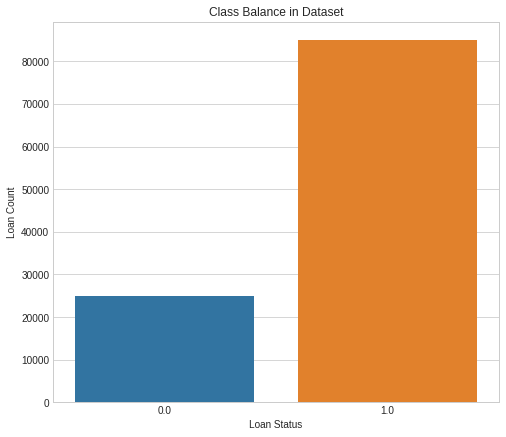

In [14]:
#Checking balance in classes
plt.figure(figsize=(8,7))
sns.countplot(data['Loan Status'])
plt.title('Class Balance in Dataset')
plt.ylabel('Loan Count')
plt.show()

In [16]:
# % of class balance
print((data['Loan Status'].value_counts()/len(data['Loan Status']))*100)

1.000000   77.321818
0.000000   22.678182
Name: Loan Status, dtype: float64


#### Above is expected as generally the positive class or the Charged off class here will be a minority class .

###  Missing Value Check

In [17]:

print(data.isnull().sum())

Current Loan Amount             0
Credit Score                    0
Annual Income                   0
Years in current job            0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Loan Status                     0
Term                            0
Home Ownership                  0
Purpose                         0
dtype: int64


In [18]:
data.columns[data.isnull().any()]

Index([], dtype='object')

## Handling Missing Values & Data Distribution Check

### Feature 1: Months since last delinquent

####  Missing Value Check .

In [19]:
data['Months since last delinquent'].unique()

array([  0.,   8.,  29.,  10.,  33.,  76.,  25.,  46.,  34.,  53.,  30.,
        32.,  21.,  50.,  20.,  24.,  15.,   6.,  13.,  48.,  69.,  42.,
        35.,   7.,  27.,   5.,  26.,  17.,  72.,  65.,   4.,  11.,  54.,
        31.,  19.,  41.,  73.,  60.,  77.,  18.,   9.,  80.,  70.,  38.,
        47.,  82.,  74.,  16.,  75.,  61.,  79.,  62.,  56.,  64.,  36.,
        39.,  59.,  55.,  37.,  58.,  68.,  22.,  45.,  14.,  51.,  49.,
         1.,  81.,  63.,  71.,  43.,  40.,  12.,  52.,   3.,  66.,  23.,
        57.,  78.,  44.,   2.,  28.,  88.,  67.,  85.,  89., 118.,  83.,
       152., 120.,  92.,  86.,  94., 110.,  93.,  97.,  84., 130., 129.,
       106.,  90., 107., 176., 108.,  87., 139., 143., 114.,  91., 104.,
       115., 100., 148., 141.,  96., 131.])

In [20]:
# Save the preprocess CSV file in some saperate location with the time stamp

import time
import os

def saveUpdatedDataSet_path(UpdatedDataSet_path="UPDATED_DATASET"):
    os.makedirs(UpdatedDataSet_path, exist_ok=True)
    fileName = time.strftime("credit_ver_%Y_%m_%d_%H_%M_%S_.csv")    
    UpdatedDataSet_path = os.path.join(UpdatedDataSet_path, fileName)
    print(f"your UpdatedDataSet will be saved at the following location\n{UpdatedDataSet_path}")
    return UpdatedDataSet_path

In [21]:
data.to_csv(saveUpdatedDataSet_path(),index=False)

your UpdatedDataSet will be saved at the following location
UPDATED_DATASET/credit_ver_2021_01_24_09_24_59_.csv


In [22]:
data['Months since last delinquent']=data['Months since last delinquent'].replace(np.nan,0)

In [23]:
data.columns[data.isnull().any()]

Index([], dtype='object')

#### Delinquency Data Distribution .

/home/rajesh/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


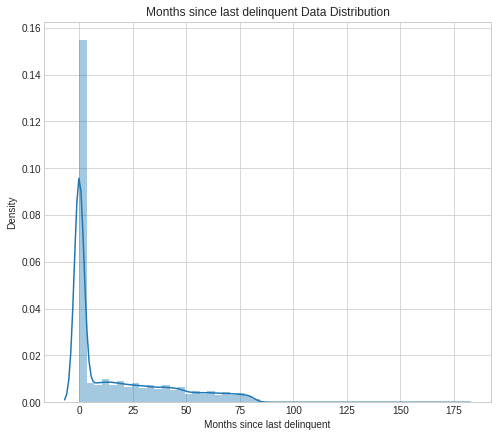

In [24]:
plt.figure(figsize=(8,7))
sns.distplot(data['Months since last delinquent'])
plt.title ('Months since last delinquent Data Distribution')
plt.show()


### Feature 2: Years in current job

#### Missing Value Check .

In [25]:
print(data['Years in current job'].isnull().sum())

0


In [26]:
print(data['Years in current job'].unique())

[ 8.  10.   3.   5.   0.8  2.   4.   9.   7.   1.   6. ]


[]

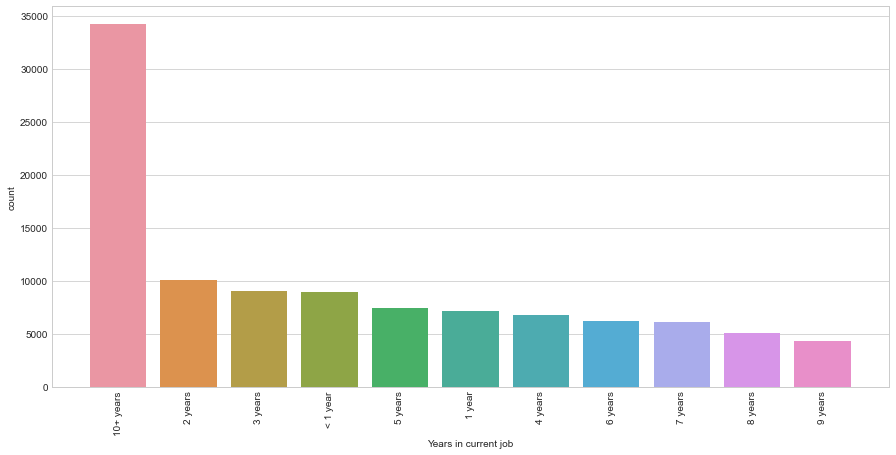

In [71]:
plt.figure(figsize=(15,7))
sns.countplot(data['Years in current job'],order=data['Years in current job'].value_counts().index)
plt.xticks(rotation=90)
plt.plot()

In [27]:
##saving the current file.

data.to_csv(saveUpdatedDataSet_path(),index=False)

your UpdatedDataSet will be saved at the following location
UPDATED_DATASET/credit_ver_2021_01_24_09_26_53_.csv


In [28]:
Years=[]
for i in data['Years in current job']:
    
    if i=='8 years':
        Years.append(8)
    elif i=='6 years':
        Years.append(6)
    elif i=='3 years':
        Years.append(3)
    elif i=='5 years':
        Years.append(5)
    elif i=='< 1 year':
        Years.append(0.8)
    elif i=='2 years':
        Years.append(2)
    elif i=='4 years':
        Years.append(4)
    elif i=='9 years':
        Years.append(9)
    elif i=='7 years':
        Years.append(7)
    elif i=='1 year':
        Years.append(1)
    else :
        
        Years.append(10)

In [29]:
def unique(list1): 
    x = np.array(list1) 
    print(np.unique(x))
print(unique(Years))

[10]
None


In [30]:
data['Years in current job']=Years

In [31]:
print(data['Years in current job'].unique())

[10]


In [32]:
data.columns[data.isnull().any()]

Index([], dtype='object')

#### Work Experience Data Distribution .

/home/rajesh/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/rajesh/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


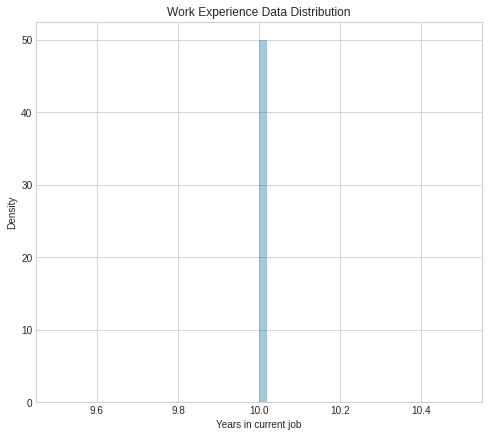

In [33]:
plt.figure(figsize=(8,7))
sns.distplot(data['Years in current job'])
plt.title ('Work Experience Data Distribution')
plt.show()

[]

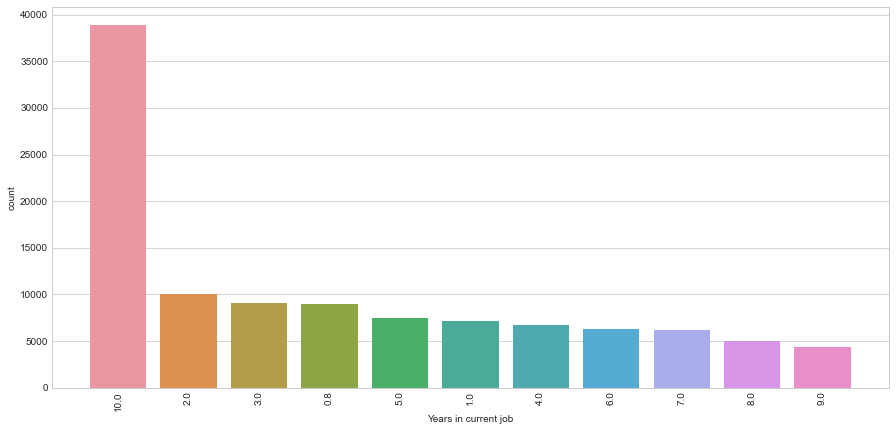

In [79]:
plt.figure(figsize=(15,7))
sns.countplot(data['Years in current job'],order=data['Years in current job'].value_counts().index)
plt.xticks(rotation=90)
plt.plot()

In [34]:
##saving the current file.

data.to_csv(saveUpdatedDataSet_path(),index=False)

your UpdatedDataSet will be saved at the following location
UPDATED_DATASET/credit_ver_2021_01_24_09_27_42_.csv


In [35]:
#Remaining columns
data.isnull().sum()

Current Loan Amount             0
Credit Score                    0
Annual Income                   0
Years in current job            0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Loan Status                     0
Term                            0
Home Ownership                  0
Purpose                         0
dtype: int64

### Feature 3: Credit Score.

#### Credit Score Data Distribution .

In [36]:
print(data['Credit Score'].describe())

count   110000.000000
mean       716.286718
std         26.477465
min        585.000000
25%        704.000000
50%        721.000000
75%        736.400000
max        751.000000
Name: Credit Score, dtype: float64


/home/rajesh/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


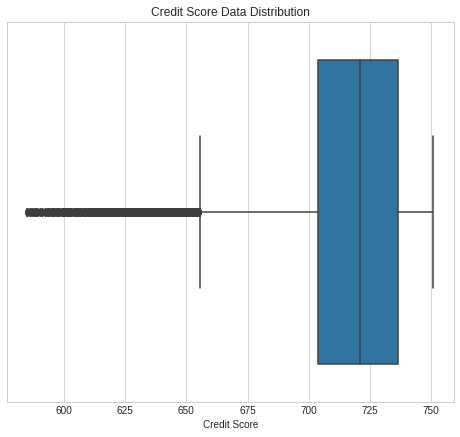

In [37]:
plt.figure(figsize=(8,7))
sns.boxplot(data['Credit Score'])
plt.title ('Credit Score Data Distribution')
plt.show()

In [38]:
data[data['Credit Score']>900]

,Current Loan Amount,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Loan Status,Term,Home Ownership,Purpose


In [39]:
##Handling the incorrect credit score values.

Cr_Scr=[]
for i in data['Credit Score']:
    if np.isnan(i):
        Cr_Scr.append(i)
    else :
        if float(str(i)[:3])>900:
                 Cr_Scr.append(900.0)
        else :
                 Cr_Scr.append(float(str(i)[:3]))
                 
                 
                 

In [40]:
print(len(Cr_Scr))

110000


In [41]:
data['Credit Score']=Cr_Scr

In [42]:
print(data['Credit Score'].describe())

count   110000.000000
mean       716.209964
std         26.478479
min        585.000000
25%        704.000000
50%        721.000000
75%        736.000000
max        751.000000
Name: Credit Score, dtype: float64


In [43]:
data['Credit Score'].isnull().sum()

0

/home/rajesh/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


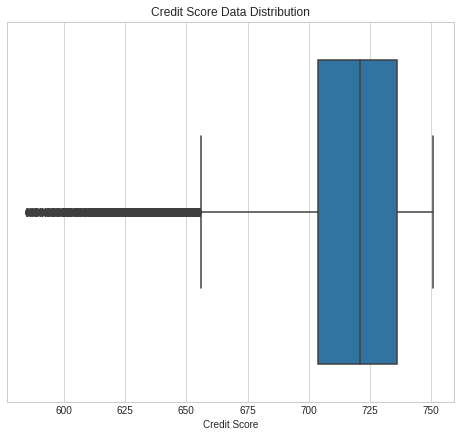

In [44]:
plt.figure(figsize=(8,7))
sns.boxplot(data['Credit Score'])
plt.title ('Credit Score Data Distribution')
plt.show()

In [45]:
##saving the current file.

data.to_csv(saveUpdatedDataSet_path(),index=False)

your UpdatedDataSet will be saved at the following location
UPDATED_DATASET/credit_ver_2021_01_24_09_28_32_.csv


### Feature 4: Home Ownership .

#### Data Quality Check .

/home/rajesh/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

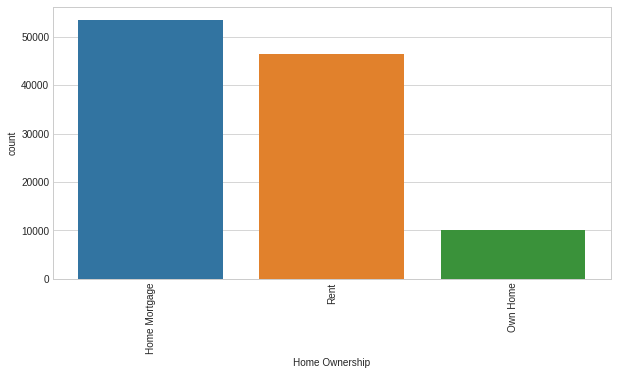

In [46]:
plt.figure(figsize=(10,5))
sns.countplot(data['Home Ownership'],order=data['Home Ownership'].value_counts().index)
plt.xticks(rotation=90)
plt.plot()

In [47]:
data['Home Ownership'].unique()

array(['Home Mortgage', 'Own Home', 'Rent'], dtype=object)

In [48]:
data.replace({'Home Ownership' :{'HaveMortgage':'Home Mortgage'}},inplace=True)

[]

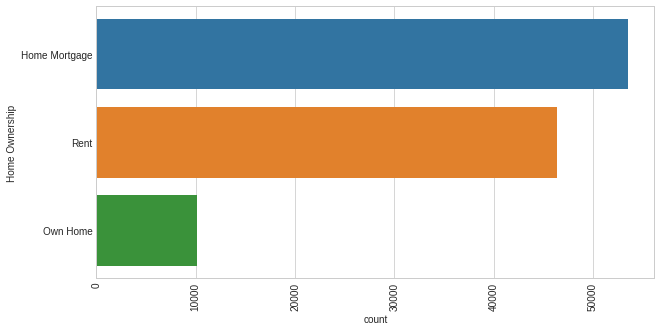

In [49]:
plt.figure(figsize=(10,5))
sns.countplot(y=data['Home Ownership'],order=data['Home Ownership'].value_counts().index)
plt.xticks(rotation=90)
plt.plot()

In [51]:
##saving the current file.

data.to_csv(saveUpdatedDataSet_path(),index=False)

your UpdatedDataSet will be saved at the following location
UPDATED_DATASET/credit_ver_2021_01_24_09_28_55_.csv


### Feature 5: Purpose .

#### Data Quality Check .

[]

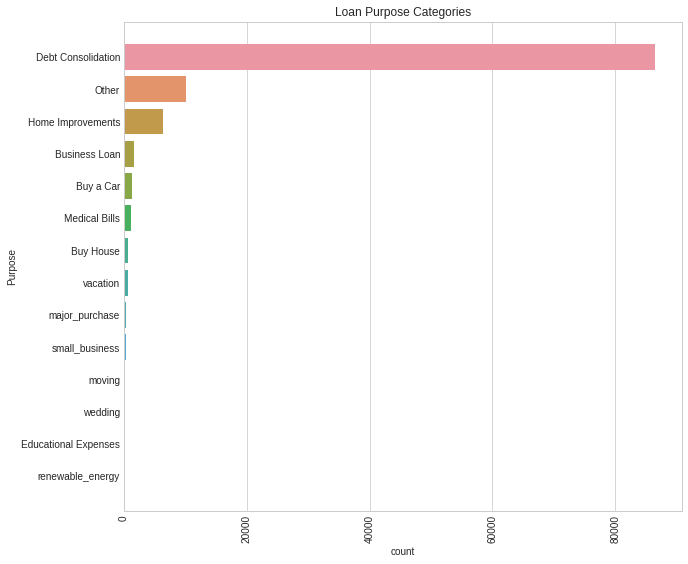

In [52]:
plt.figure(figsize=(10,9))
sns.countplot(y=data['Purpose'],order=data['Purpose'].value_counts().index)
plt.title('Loan Purpose Categories')
plt.xticks(rotation=90)
plt.plot()

In [53]:
print(data['Purpose'].unique())

['Home Improvements' 'Debt Consolidation' 'Buy House' 'Other'
 'Business Loan' 'Buy a Car' 'major_purchase' 'vacation' 'small_business'
 'Medical Bills' 'wedding' 'Educational Expenses' 'moving'
 'renewable_energy']


In [54]:
data.replace({'Purpose':{'other':'Other','Take a Trip':'vacation'}},inplace=True)

[]

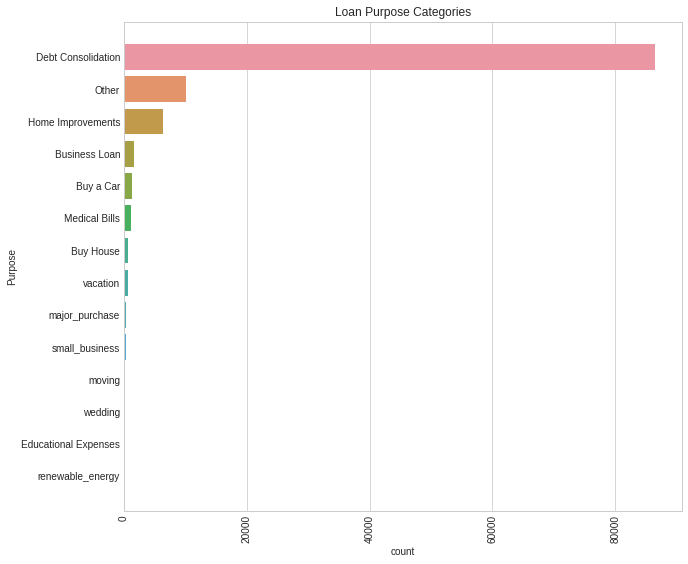

In [55]:
plt.figure(figsize=(10,9))
sns.countplot(y=data['Purpose'],order=data['Purpose'].value_counts().index)
plt.title('Loan Purpose Categories')
plt.xticks(rotation=90)
plt.plot()

In [56]:
print(data['Purpose'].unique())

['Home Improvements' 'Debt Consolidation' 'Buy House' 'Other'
 'Business Loan' 'Buy a Car' 'major_purchase' 'vacation' 'small_business'
 'Medical Bills' 'wedding' 'Educational Expenses' 'moving'
 'renewable_energy']


In [57]:
##saving the current file.

data.to_csv(saveUpdatedDataSet_path(),index=False)

your UpdatedDataSet will be saved at the following location
UPDATED_DATASET/credit_ver_2021_01_24_09_29_25_.csv


### Feature 6: Term .


#### Data Quality Check .

[]

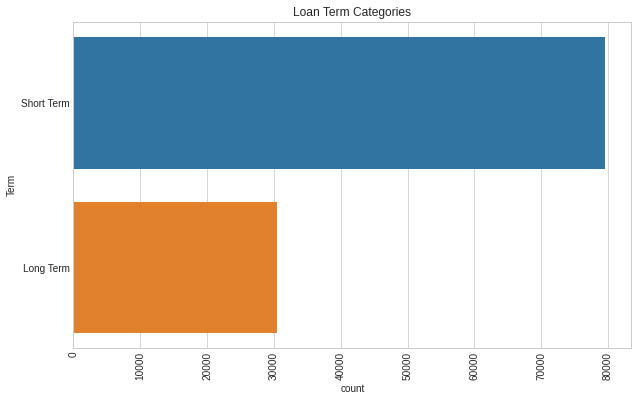

In [58]:
plt.figure(figsize=(10,6))
sns.countplot(y=data['Term'],order=data['Term'].value_counts().index)
plt.title('Loan Term Categories')
plt.xticks(rotation=90)
plt.plot()

Looks like this feature is fine.

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110000 entries, 0 to 109999
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Current Loan Amount           110000 non-null  float64
 1   Credit Score                  110000 non-null  float64
 2   Annual Income                 110000 non-null  float64
 3   Years in current job          110000 non-null  int64  
 4   Monthly Debt                  110000 non-null  float64
 5   Years of Credit History       110000 non-null  float64
 6   Months since last delinquent  110000 non-null  float64
 7   Number of Open Accounts       110000 non-null  float64
 8   Number of Credit Problems     110000 non-null  float64
 9   Current Credit Balance        110000 non-null  float64
 10  Maximum Open Credit           110000 non-null  float64
 11  Loan Status                   110000 non-null  float64
 12  Term                          110000 non-nul

### Imputing the data.

KNN Imputing will work only numerical columns . We will first get the numerical columns and impute them and then add them to the main dataset.

In [60]:
num_cols=data.select_dtypes(include=np.number)

In [61]:
data.select_dtypes(include=np.number).columns.to_list()

['Current Loan Amount',
 'Credit Score',
 'Annual Income',
 'Years in current job',
 'Monthly Debt',
 'Years of Credit History',
 'Months since last delinquent',
 'Number of Open Accounts',
 'Number of Credit Problems',
 'Current Credit Balance',
 'Maximum Open Credit',
 'Loan Status']

In [62]:
num_cols.head()

,Current Loan Amount,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Loan Status
0,445412.000000,709.000000,1167493.000000,10,5214.740000,17.200000,0.000000,6.000000,1.000000,228190.000000,416746.000000,1.000000
1,262328.000000,740.000000,1470550.600000,10,33295.980000,21.100000,8.000000,35.000000,0.000000,229976.000000,850784.000000,1.000000
2,496830.400000,741.000000,2231892.000000,10,29200.530000,14.900000,29.000000,18.000000,1.000000,297996.000000,750090.000000,1.000000
3,347666.000000,721.000000,806949.000000,10,8741.900000,12.000000,0.000000,9.000000,0.000000,256329.000000,386958.000000,1.000000
4,176220.000000,731.000000,1034287.800000,10,20639.700000,6.100000,0.000000,15.000000,0.000000,253460.000000,427174.000000,1.000000


In [63]:
num_cols.isnull().sum()

Current Loan Amount             0
Credit Score                    0
Annual Income                   0
Years in current job            0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Loan Status                     0
dtype: int64

In [68]:
#Creating instance of KNNImputer.
impute_knn=KNNImputer()

In [69]:
trans=impute_knn.fit_transform(num_cols)

In [70]:
#Checking some dataset. Transformed data is in array format .
trans[:2,:]

array([[4.4541200e+05, 7.0900000e+02, 1.1674930e+06, 1.0000000e+01,
        5.2147400e+03, 1.7200000e+01, 0.0000000e+00, 6.0000000e+00,
        1.0000000e+00, 2.2819000e+05, 4.1674600e+05, 1.0000000e+00],
       [2.6232800e+05, 7.4000000e+02, 1.4705506e+06, 1.0000000e+01,
        3.3295980e+04, 2.1100000e+01, 8.0000000e+00, 3.5000000e+01,
        0.0000000e+00, 2.2997600e+05, 8.5078400e+05, 1.0000000e+00]])

In [75]:
num_cols.columns

Index(['Current Loan Amount', 'Credit Score', 'Annual Income',
       'Years in current job', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Loan Status'],
      dtype='object')

In [77]:
trans_dataframe=pd.DataFrame(trans,columns=['Current Loan Amount',
 'Credit Score',
 'Annual Income',
 'Years in current job',
 'Monthly Debt',
 'Years of Credit History',
 'Months since last delinquent',
 'Number of Open Accounts',
 'Number of Credit Problems',
 'Current Credit Balance',
 'Maximum Open Credit',
 'Tax Liens'])

In [78]:
trans_dataframe.head()

,Current Loan Amount,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Tax Liens
0,445412.000000,709.000000,1167493.000000,10.000000,5214.740000,17.200000,0.000000,6.000000,1.000000,228190.000000,416746.000000,1.000000
1,262328.000000,740.000000,1470550.600000,10.000000,33295.980000,21.100000,8.000000,35.000000,0.000000,229976.000000,850784.000000,1.000000
2,496830.400000,741.000000,2231892.000000,10.000000,29200.530000,14.900000,29.000000,18.000000,1.000000,297996.000000,750090.000000,1.000000
3,347666.000000,721.000000,806949.000000,10.000000,8741.900000,12.000000,0.000000,9.000000,0.000000,256329.000000,386958.000000,1.000000
4,176220.000000,731.000000,1034287.800000,10.000000,20639.700000,6.100000,0.000000,15.000000,0.000000,253460.000000,427174.000000,1.000000


In [79]:
trans_dataframe.isnull().sum()

Current Loan Amount             0
Credit Score                    0
Annual Income                   0
Years in current job            0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Tax Liens                       0
dtype: int64

In [80]:
trans_dataframe.describe()

,Current Loan Amount,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Tax Liens
count,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000
mean,312484.539240,716.209964,1367203.236140,10.000000,18468.526823,18.202485,16.359682,11.124491,0.168055,294282.171564,754088.666840,0.773218
std,181241.576848,26.478479,993697.100715,0.000000,12195.564391,7.015575,23.011923,5.011093,0.484389,377277.271885,8013929.854633,0.418752
min,10802.000000,585.000000,76627.000000,10.000000,0.000000,3.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,175054.000000,704.000000,868224.000000,10.000000,10211.930000,13.500000,0.000000,8.000000,0.000000,112195.000000,273152.000000,1.000000
50%,269324.000000,721.000000,1182003.300000,10.000000,16202.440000,16.900000,0.000000,10.000000,0.000000,209665.000000,467379.000000,1.000000
75%,430408.000000,736.000000,1631118.650000,10.000000,23997.522500,21.700000,30.000000,14.000000,0.000000,367483.750000,783183.500000,1.000000
max,789250.000000,751.000000,165557393.000000,10.000000,435843.280000,70.500000,176.000000,76.000000,15.000000,32878968.000000,1539737892.000000,1.000000


In [81]:
print(trans_dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110000 entries, 0 to 109999
Data columns (total 12 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Current Loan Amount           110000 non-null  float64
 1   Credit Score                  110000 non-null  float64
 2   Annual Income                 110000 non-null  float64
 3   Years in current job          110000 non-null  float64
 4   Monthly Debt                  110000 non-null  float64
 5   Years of Credit History       110000 non-null  float64
 6   Months since last delinquent  110000 non-null  float64
 7   Number of Open Accounts       110000 non-null  float64
 8   Number of Credit Problems     110000 non-null  float64
 9   Current Credit Balance        110000 non-null  float64
 10  Maximum Open Credit           110000 non-null  float64
 11  Tax Liens                     110000 non-null  float64
dtypes: float64(12)
memory usage: 10.1 MB
None


In [83]:
data.select_dtypes(exclude=np.number).columns.to_list()

['Term', 'Home Ownership', 'Purpose']

In [84]:
New_Data=pd.concat([trans_dataframe,data[data.select_dtypes(exclude=np.number).columns.to_list()]],axis=1)

In [85]:
New_Data.head()

,Current Loan Amount,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Tax Liens,Term,Home Ownership,Purpose
0,445412.000000,709.000000,1167493.000000,10.000000,5214.740000,17.200000,0.000000,6.000000,1.000000,228190.000000,416746.000000,1.000000,Short Term,Home Mortgage,Home Improvements
1,262328.000000,740.000000,1470550.600000,10.000000,33295.980000,21.100000,8.000000,35.000000,0.000000,229976.000000,850784.000000,1.000000,Short Term,Home Mortgage,Debt Consolidation
2,496830.400000,741.000000,2231892.000000,10.000000,29200.530000,14.900000,29.000000,18.000000,1.000000,297996.000000,750090.000000,1.000000,Short Term,Own Home,Debt Consolidation
3,347666.000000,721.000000,806949.000000,10.000000,8741.900000,12.000000,0.000000,9.000000,0.000000,256329.000000,386958.000000,1.000000,Long Term,Own Home,Debt Consolidation
4,176220.000000,731.000000,1034287.800000,10.000000,20639.700000,6.100000,0.000000,15.000000,0.000000,253460.000000,427174.000000,1.000000,Short Term,Rent,Debt Consolidation


In [86]:
data.head()

,Current Loan Amount,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Loan Status,Term,Home Ownership,Purpose
0,445412.000000,709.000000,1167493.000000,10,5214.740000,17.200000,0.000000,6.000000,1.000000,228190.000000,416746.000000,1.000000,Short Term,Home Mortgage,Home Improvements
1,262328.000000,740.000000,1470550.600000,10,33295.980000,21.100000,8.000000,35.000000,0.000000,229976.000000,850784.000000,1.000000,Short Term,Home Mortgage,Debt Consolidation
2,496830.400000,741.000000,2231892.000000,10,29200.530000,14.900000,29.000000,18.000000,1.000000,297996.000000,750090.000000,1.000000,Short Term,Own Home,Debt Consolidation
3,347666.000000,721.000000,806949.000000,10,8741.900000,12.000000,0.000000,9.000000,0.000000,256329.000000,386958.000000,1.000000,Long Term,Own Home,Debt Consolidation
4,176220.000000,731.000000,1034287.800000,10,20639.700000,6.100000,0.000000,15.000000,0.000000,253460.000000,427174.000000,1.000000,Short Term,Rent,Debt Consolidation


In [87]:
print(New_Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110000 entries, 0 to 109999
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Current Loan Amount           110000 non-null  float64
 1   Credit Score                  110000 non-null  float64
 2   Annual Income                 110000 non-null  float64
 3   Years in current job          110000 non-null  float64
 4   Monthly Debt                  110000 non-null  float64
 5   Years of Credit History       110000 non-null  float64
 6   Months since last delinquent  110000 non-null  float64
 7   Number of Open Accounts       110000 non-null  float64
 8   Number of Credit Problems     110000 non-null  float64
 9   Current Credit Balance        110000 non-null  float64
 10  Maximum Open Credit           110000 non-null  float64
 11  Tax Liens                     110000 non-null  float64
 12  Term                          110000 non-nul

In [89]:
##saving the current file.

New_Data.to_csv(saveUpdatedDataSet_path(),index=False)

your UpdatedDataSet will be saved at the following location
UPDATED_DATASET/credit_ver_2021_01_24_09_37_45_.csv


### Correlation Check

### Pearson Correlation.

In [90]:

sns.pairplot(trans_dataframe)
plt.show()

KeyboardInterrupt: 

In [91]:
corr=trans_dataframe.corr()
corr

,Current Loan Amount,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Tax Liens
Current Loan Amount,1.000000,-0.216178,0.402247,NaN,0.448162,0.162339,-0.020676,0.212714,-0.079274,0.339872,0.038895,-0.032941
Credit Score,-0.216178,1.000000,-0.014176,NaN,-0.095430,0.069171,-0.051304,-0.013992,-0.041086,-0.017030,0.016346,0.094521
Annual Income,0.402247,-0.014176,1.000000,NaN,0.490095,0.165662,0.009564,0.158889,-0.022094,0.329698,0.048943,0.041863
Years in current job,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Monthly Debt,0.448162,-0.095430,0.490095,NaN,1.000000,0.198901,0.006329,0.411969,-0.053656,0.480003,0.040958,-0.006167
Years of Credit History,0.162339,0.069171,0.165662,NaN,0.198901,1.000000,0.087696,0.131977,0.062997,0.206620,0.031841,0.022724
Months since last delinquent,-0.020676,-0.051304,0.009564,NaN,0.006329,0.087696,1.000000,0.029454,0.079146,-0.071822,-0.011419,0.010623
Number of Open Accounts,0.212714,-0.013992,0.158889,NaN,0.411969,0.131977,0.029454,1.000000,-0.013503,0.226929,0.032835,-0.008701
Number of Credit Problems,-0.079274,-0.041086,-0.022094,NaN,-0.053656,0.062997,0.079146,-0.013503,1.000000,-0.111639,-0.012526,-0.001914
Current Credit Balance,0.339872,-0.017030,0.329698,NaN,0.480003,0.206620,-0.071822,0.226929,-0.111639,1.000000,0.142585,0.009719


In [92]:
trans_dataframe.corr().abs()

,Current Loan Amount,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Tax Liens
Current Loan Amount,1.000000,0.216178,0.402247,NaN,0.448162,0.162339,0.020676,0.212714,0.079274,0.339872,0.038895,0.032941
Credit Score,0.216178,1.000000,0.014176,NaN,0.095430,0.069171,0.051304,0.013992,0.041086,0.017030,0.016346,0.094521
Annual Income,0.402247,0.014176,1.000000,NaN,0.490095,0.165662,0.009564,0.158889,0.022094,0.329698,0.048943,0.041863
Years in current job,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Monthly Debt,0.448162,0.095430,0.490095,NaN,1.000000,0.198901,0.006329,0.411969,0.053656,0.480003,0.040958,0.006167
Years of Credit History,0.162339,0.069171,0.165662,NaN,0.198901,1.000000,0.087696,0.131977,0.062997,0.206620,0.031841,0.022724
Months since last delinquent,0.020676,0.051304,0.009564,NaN,0.006329,0.087696,1.000000,0.029454,0.079146,0.071822,0.011419,0.010623
Number of Open Accounts,0.212714,0.013992,0.158889,NaN,0.411969,0.131977,0.029454,1.000000,0.013503,0.226929,0.032835,0.008701
Number of Credit Problems,0.079274,0.041086,0.022094,NaN,0.053656,0.062997,0.079146,0.013503,1.000000,0.111639,0.012526,0.001914
Current Credit Balance,0.339872,0.017030,0.329698,NaN,0.480003,0.206620,0.071822,0.226929,0.111639,1.000000,0.142585,0.009719


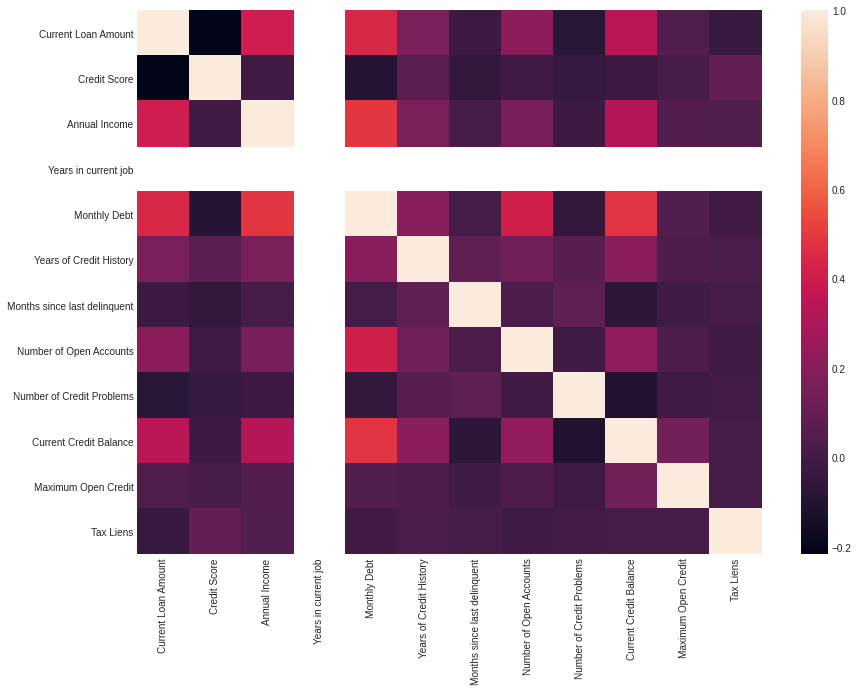

In [93]:
plt.figure(figsize=(14,10))
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)
plt.show()

### Spearman Rank Correlation .

In [95]:
corr_spear=trans_dataframe.corr(method='spearman')
corr_spear

,Current Loan Amount,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Tax Liens
Current Loan Amount,1.000000,-0.165113,0.547606,NaN,0.451265,0.179779,-0.010333,0.235868,-0.095787,0.485101,0.455705,-0.031420
Credit Score,-0.165113,1.000000,0.009022,NaN,-0.094112,0.084880,-0.090703,0.003117,-0.058948,-0.015865,0.163846,0.091503
Annual Income,0.547606,0.009022,1.000000,NaN,0.591385,0.257749,0.059897,0.254445,-0.051540,0.409414,0.413957,0.060657
Years in current job,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Monthly Debt,0.451265,-0.094112,0.591385,NaN,1.000000,0.216783,0.038104,0.462481,-0.066166,0.526547,0.430628,-0.010791
Years of Credit History,0.179779,0.084880,0.257749,NaN,0.216783,1.000000,0.138407,0.145920,0.080943,0.265999,0.284569,0.028245
Months since last delinquent,-0.010333,-0.090703,0.059897,NaN,0.038104,0.138407,1.000000,0.052195,0.052908,-0.114128,-0.121329,0.010295
Number of Open Accounts,0.235868,0.003117,0.254445,NaN,0.462481,0.145920,0.052195,1.000000,-0.007640,0.375320,0.491762,-0.009193
Number of Credit Problems,-0.095787,-0.058948,-0.051540,NaN,-0.066166,0.080943,0.052908,-0.007640,1.000000,-0.205040,-0.172953,0.000003
Current Credit Balance,0.485101,-0.015865,0.409414,NaN,0.526547,0.265999,-0.114128,0.375320,-0.205040,1.000000,0.778525,-0.007346


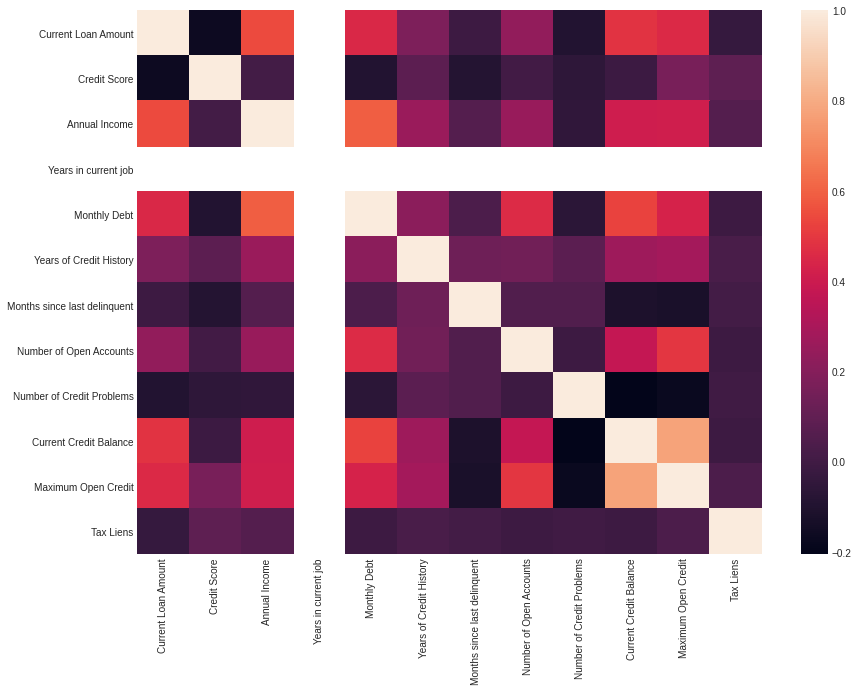

In [96]:
plt.figure(figsize=(14,10))
sns.heatmap(corr_spear,xticklabels=corr_spear.columns.values,yticklabels=corr_spear.columns.values)
plt.show()

Checking Columns with High Correlations .

In [97]:
# Calculate the correlation matrix and take the absolute value
corr_matrix = New_Data.corr().abs()
# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)
# List column names of highly correlated features (r > 0.4)
high_cor = [c for c in tri_df.columns if any(tri_df[c] > 0.4)]
# Drop the features in the to_drop list
#reduced_df = ansur_df.drop(to_drop, axis=1)
#print("The reduced_df dataframe has {} columns".format(reduced_df.shape[1]))
high_cor

['Current Loan Amount', 'Annual Income', 'Monthly Debt']

In [98]:
New_Data[high_cor].corr()

,Current Loan Amount,Annual Income,Monthly Debt
Current Loan Amount,1.000000,0.402247,0.448162
Annual Income,0.402247,1.000000,0.490095
Monthly Debt,0.448162,0.490095,1.000000


#### Checking Graphically for Highly Correlated Columns.

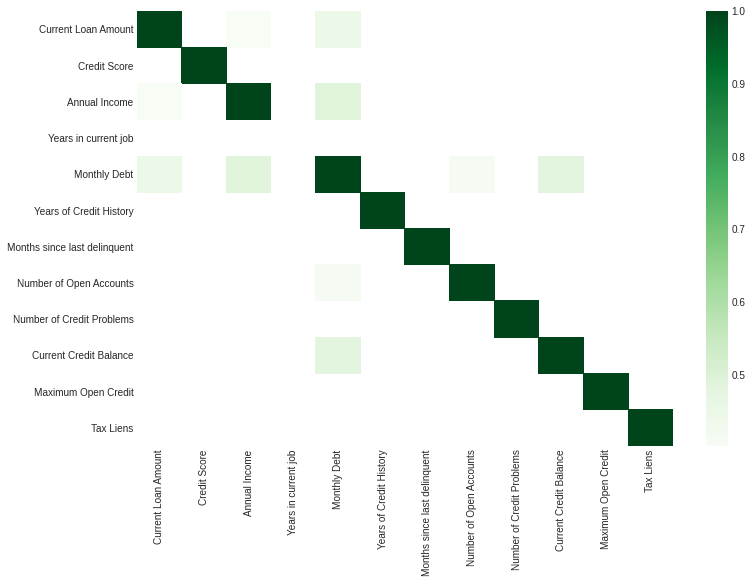

In [99]:
c = New_Data.corr()
kot = corr[corr>=.4]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Greens")
plt.show()

Above Shows correlation for above 0.4 i.e positive correlations but we can have correlations which can have negative values.
We will try a different method where we can include both positive and negative corrleations.

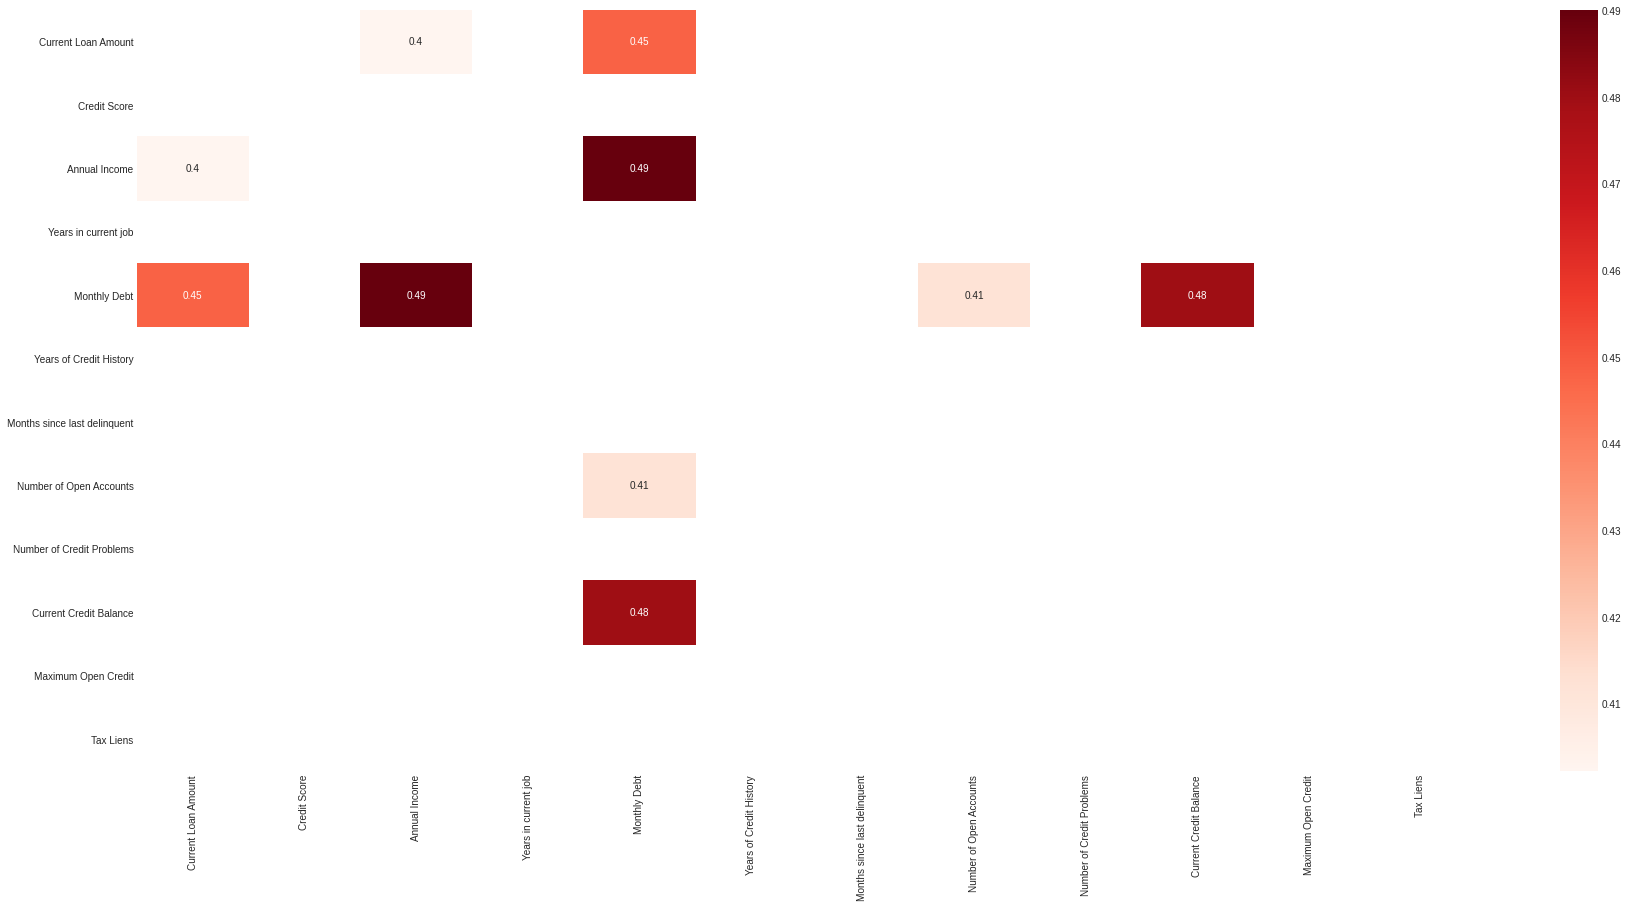

In [100]:
dfCorr = New_Data.corr()
filteredDf = dfCorr[((dfCorr >= .4) | (dfCorr <= -.4)) & (dfCorr !=1.000)]
plt.figure(figsize=(30,14))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

Lets print out the values of correlation 

In [101]:
dfCorr_abs = New_Data.corr().abs()
s=dfCorr_abs.unstack()
so=s.sort_values(kind="quicksort",ascending=False)
type(so)
#print(so.iloc[13:])
so.iloc[13:36]

Monthly Debt             Current Credit Balance    0.480003
Current Credit Balance   Monthly Debt              0.480003
Monthly Debt             Current Loan Amount       0.448162
Current Loan Amount      Monthly Debt              0.448162
Number of Open Accounts  Monthly Debt              0.411969
Monthly Debt             Number of Open Accounts   0.411969
Annual Income            Current Loan Amount       0.402247
Current Loan Amount      Annual Income             0.402247
                         Current Credit Balance    0.339872
Current Credit Balance   Current Loan Amount       0.339872
                         Annual Income             0.329698
Annual Income            Current Credit Balance    0.329698
Current Credit Balance   Number of Open Accounts   0.226929
Number of Open Accounts  Current Credit Balance    0.226929
Current Loan Amount      Credit Score              0.216178
Credit Score             Current Loan Amount       0.216178
Number of Open Accounts  Current Loan Am

From the above visualizations and numeric displays it is clear that 'Number of Credit Problems' is higly correlated with Bankruptcies & Tax Liens.
Before taking decison on whether wew can drop any of the columns lets check the data distribution once.


###### Number of Credit Problems

/home/rajesh/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


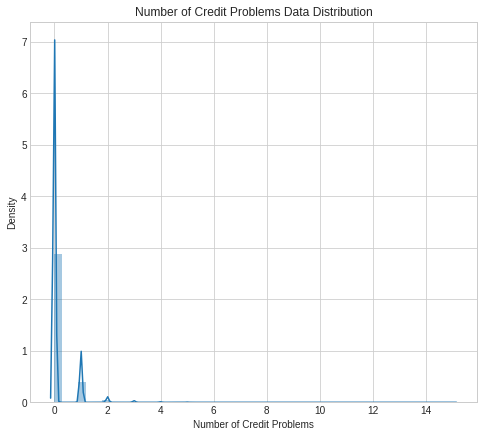

In [102]:
plt.figure(figsize=(8,7))
sns.distplot(data['Number of Credit Problems'])
plt.title ('Number of Credit Problems Data Distribution')
plt.show()

In [103]:
New_Data['Number of Credit Problems'].unique()

array([ 1.,  0.,  2.,  5.,  4.,  3.,  7.,  6., 11., 15., 10.,  8.,  9.,
       12.])

In [104]:
New_Data['Number of Credit Problems'].describe()

count   110000.000000
mean         0.168055
std          0.484389
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         15.000000
Name: Number of Credit Problems, dtype: float64

##### Bankruptcies

plt.figure(figsize=(8,5))
sns.distplot(New_Data['Bankruptcies'])
plt.title ('Bankruptcies Data Distribution')
plt.show()

New_Data['Bankruptcies'].unique()

In [202]:
New_Data['Bankruptcies'].describe()

count    110000.000000
mean          0.117591
std           0.351053
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           7.000000
Name: Bankruptcies, dtype: float64

In [204]:
New_Data['Bankruptcies'].value_counts()

0.0    97828
1.0    11498
2.0      463
3.0      107
0.2       36
4.0       27
0.4       18
0.6        9
5.0        8
6.0        2
1.2        2
7.0        1
0.8        1
Name: Bankruptcies, dtype: int64

Above bankruptcy data shows some decimal values which doesnt look possible, might be because of KNNImputation missing values would have been filled with some aggreegates which resulted in decimal values.
We will tackle this by rounding the values to the nearest integer.

In [205]:
Bankr=[round(i) for i in New_Data['Bankruptcies'] ]

In [206]:
New_Data['Bankruptcies']=Bankr

In [222]:
##saving the current file.

New_Data.to_csv('D:\\iNeuron\\intership_2\\credit_ver8.csv',index=False)

In [207]:
New_Data['Bankruptcies'].value_counts()

0    97882
1    11510
2      463
3      107
4       27
5        8
6        2
7        1
Name: Bankruptcies, dtype: int64

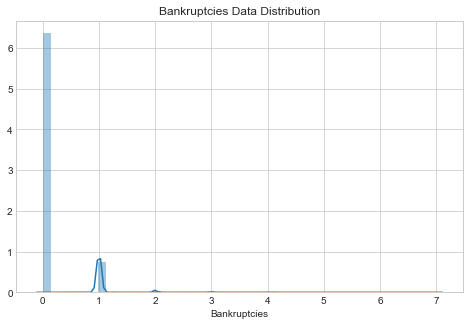

In [209]:
plt.figure(figsize=(8,5))
sns.distplot(New_Data['Bankruptcies'])
plt.title ('Bankruptcies Data Distribution')
plt.show()

Now all bankrupty data is integers , as of now we are going with the same values but later can be a situation where there is a confirmation from business that bankruptcy can have binary values i.e. either bankrupt or not i.e. 0 or 1.

### Chi Square Test 

#### Home Ownership v/s Loan Status 

In [108]:
New_Data.select_dtypes(exclude=np.number).columns.to_list()

['Term', 'Home Ownership', 'Purpose']

In [109]:
New_Data.columns

Index(['Current Loan Amount', 'Credit Score', 'Annual Income',
       'Years in current job', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Tax Liens', 'Term', 'Home Ownership',
       'Purpose'],
      dtype='object')

In [110]:
#Creating contigency table
data_crosstab=pd.crosstab(New_Data['Home Ownership'],New_Data['Purpose'])

In [111]:
data_crosstab

Purpose,Business Loan,Buy House,Buy a Car,Debt Consolidation,Educational Expenses,Home Improvements,Medical Bills,Other,major_purchase,moving,renewable_energy,small_business,vacation,wedding
Home Ownership,,,,,,,,,,,,,,
Home Mortgage,843,252,553,41709,30,5050,563,3887,164,29,6,139,250,32
Own Home,147,87,176,7570,10,868,131,953,52,3,1,24,64,10
Rent,742,409,678,37151,73,514,546,5316,188,132,4,151,410,83


/home/rajesh/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


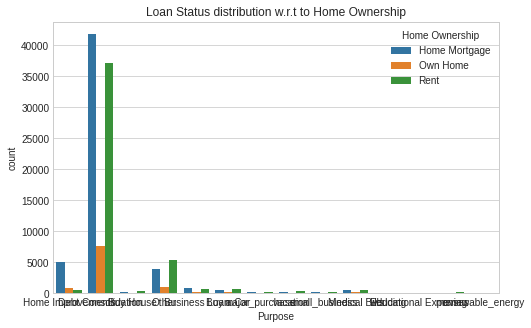

In [112]:
#First checking in bar plot, then will go chi square test
plt.figure(figsize=(8,5))
sns.countplot(New_Data['Purpose'],hue=New_Data['Home Ownership'])
plt.title('Loan Status distribution w.r.t to Home Ownership')
plt.show()

Looks like Rented people default marginally more than HomeMortgage.


In [115]:
stat, p, dof, expected = chi2_contingency(data_crosstab)
print('dof=%d' % dof)
print(stat)
print('p value =',p)
print(expected)

dof=26
3966.3140924185286
p value = 0.0
[[8.42492036e+02 3.63847600e+02 6.84403173e+02 4.20419092e+04
  5.49662818e+01 3.12870022e+03 6.03169818e+02 4.94015538e+03
  1.96516618e+02 7.97740727e+01 5.35070000e+00 1.52738164e+02
  3.52173345e+02 6.08034091e+01]
 [1.58966109e+02 6.86528000e+01 1.29137018e+02 7.93270255e+03
  1.03713455e+01 5.90340655e+02 1.13809455e+02 9.32136145e+02
  3.70798545e+01 1.50522182e+01 1.00960000e+00 2.88194909e+01
  6.64500364e+01 1.14727273e+01]
 [7.30541855e+02 3.15499600e+02 5.93459809e+02 3.64553883e+04
  4.76623727e+01 2.71295913e+03 5.23020727e+02 4.28370847e+03
  1.70403527e+02 6.91737091e+01 4.63970000e+00 1.32442345e+02
  3.05376618e+02 5.27238636e+01]]


In [116]:
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

probability=0.950, critical=38.885, stat=3966.314


In [117]:
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


Above shows there is a correlation between Loan status and HomeOwnership .

#### Purpose v/s Loan Status 

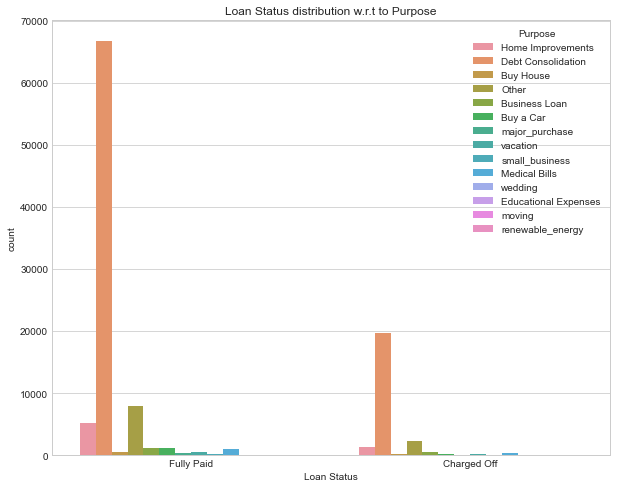

In [235]:
#First checking in bar plot, then will go chi square test
plt.figure(figsize=(10,8))
sns.countplot(New_Data['Loan Status'],hue=New_Data['Purpose'])
plt.title('Loan Status distribution w.r.t to Purpose')
plt.show()

Above doesnt give much info but most of the loans are for debt conslolidation .

In [225]:
purpose_crosstab=pd.crosstab(New_Data['Purpose'],New_Data['Loan Status'])
purpose_crosstab

Loan Status,Charged Off,Fully Paid
Purpose,,
Business Loan,525,1207
Buy House,156,592
Buy a Car,237,1170
Debt Consolidation,19720,66710
Educational Expenses,19,94
Home Improvements,1300,5132
Medical Bills,301,939
Other,2237,7919
major_purchase,93,311


In [226]:
stat, p, dof, expected = chi2_contingency(purpose_crosstab)
print('dof=%d' % dof)
print(stat)
print('p value =',p)
print(expected)

dof=13
179.21800953339405
p value = 2.4501812509707327e-31
[[3.92786109e+02 1.33921389e+03]
 [1.69632800e+02 5.78367200e+02]
 [3.19082018e+02 1.08791798e+03]
 [1.96007525e+04 6.68292475e+04]
 [2.56263455e+01 8.73736545e+01]
 [1.45866065e+03 4.97333935e+03]
 [2.81209455e+02 9.58790545e+02]
 [2.30319615e+03 7.85280385e+03]
 [9.16198545e+01 3.12380145e+02]
 [3.71922182e+01 1.26807782e+02]
 [2.49460000e+00 8.50540000e+00]
 [7.12094909e+01 2.42790509e+02]
 [1.64190036e+02 5.59809964e+02]
 [2.83477273e+01 9.66522727e+01]]


In [227]:
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

probability=0.950, critical=22.362, stat=179.218


In [228]:
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


Above shows there is a correlation between Loan status and Purpose .

#### Term v/s Loan Status 

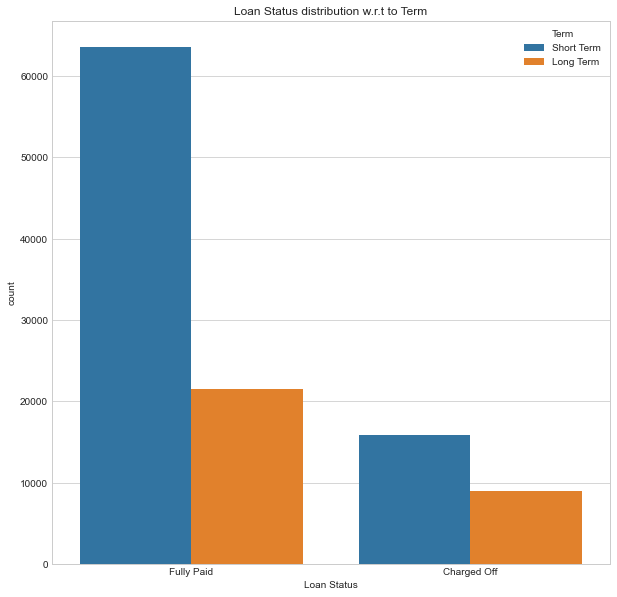

In [229]:
#First checking in bar plot, then will go chi square test
plt.figure(figsize=(10,10))
sns.countplot(New_Data['Loan Status'],hue=New_Data['Term'])
plt.title('Loan Status distribution w.r.t to Term')
plt.show()

In [230]:
Term_crosstab=pd.crosstab(New_Data['Term'],New_Data['Loan Status'])
Term_crosstab

Loan Status,Charged Off,Fully Paid
Term,,
Long Term,9021,21476
Short Term,15925,63578


In [231]:
stat, p, dof, expected = chi2_contingency(Term_crosstab)
print('dof=%d' % dof)
print(stat)
print('p value =',p)
print(expected)

dof=1
1145.7014696246358
p value = 3.855786713886794e-251
[[ 6916.16510909 23580.83489091]
 [18029.83489091 61473.16510909]]


In [232]:
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

probability=0.950, critical=3.841, stat=1145.701


In [233]:
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


Above shows there is a correlation between Loan status and Term .

### Basic Data Exploration using profiling libraries 

#### SweetViz

SweetViz needs target columns to be numeric , we will create a column with 1 as Defaulter or Chargedoff and 0 as FullyPaid column.

In [118]:
New_Data.replace({'Loan Status':{'Fully Paid':1,'Charged Off':0}},inplace=True)

In [119]:
New_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110000 entries, 0 to 109999
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Current Loan Amount           110000 non-null  float64
 1   Credit Score                  110000 non-null  float64
 2   Annual Income                 110000 non-null  float64
 3   Years in current job          110000 non-null  float64
 4   Monthly Debt                  110000 non-null  float64
 5   Years of Credit History       110000 non-null  float64
 6   Months since last delinquent  110000 non-null  float64
 7   Number of Open Accounts       110000 non-null  float64
 8   Number of Credit Problems     110000 non-null  float64
 9   Current Credit Balance        110000 non-null  float64
 10  Maximum Open Credit           110000 non-null  float64
 11  Tax Liens                     110000 non-null  float64
 12  Term                          110000 non-nul

In [124]:
New_Data.columns

Index(['Current Loan Amount', 'Credit Score', 'Annual Income',
       'Years in current job', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Tax Liens', 'Term', 'Home Ownership',
       'Purpose'],
      dtype='object')

In [128]:
#Running sweetviz 
loan_report=sv.analyze(New_Data,target_feat='Term')
loan_report.show_notebook()

                                             |          | [  0%]   00:00 -> (? left)

ValueError: TARGET values can only be of NUMERICAL or BOOLEAN type for now.
CATEGORICAL type was detected; if you meant the target to be
NUMERICAL, use a FeatureConfig(force_num=...) object.

In [246]:
loan_report.show_html(filepath='D:\iNeuron\intership_2\SWEETVIZ_REPORT_CREDIT_DATA.html')

Report D:\iNeuron\intership_2\SWEETVIZ_REPORT_CREDIT_DATA.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### AutoViz

In [247]:
###Running AutoViz
loan_av=AutoViz_Class()

Shape of your Data Set: (110000, 17)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  12
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  2
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    16 Predictors classified...
        This does not include the Target column(s)
        No variables removed since no ID or low-information variables found in data set

################ Binary_Classification VISUALIZATION Started #####################
Data Set Shape: 110000 rows, 17 cols
Data Set columns info:
* Current Loan Amount: 0 nulls, 22502 unique vals, most common: {99999999.0: 12617, 2233

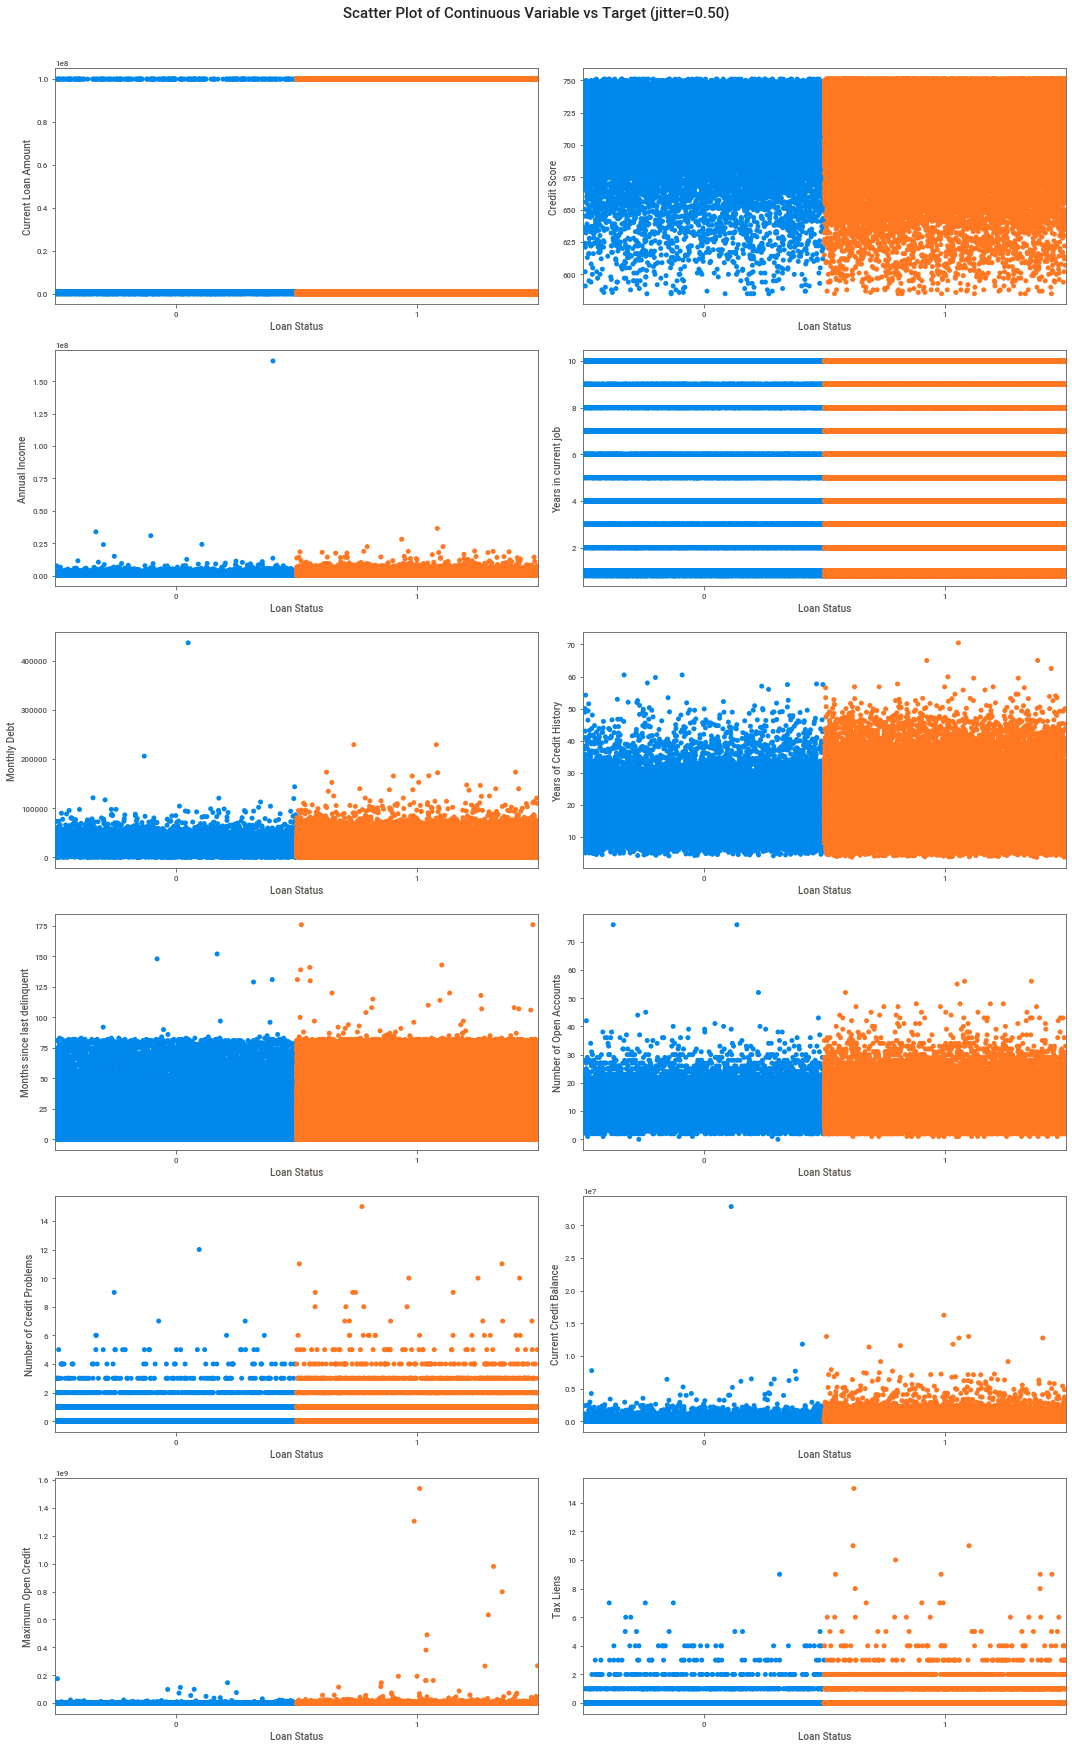

Total Number of Scatter Plots = 78


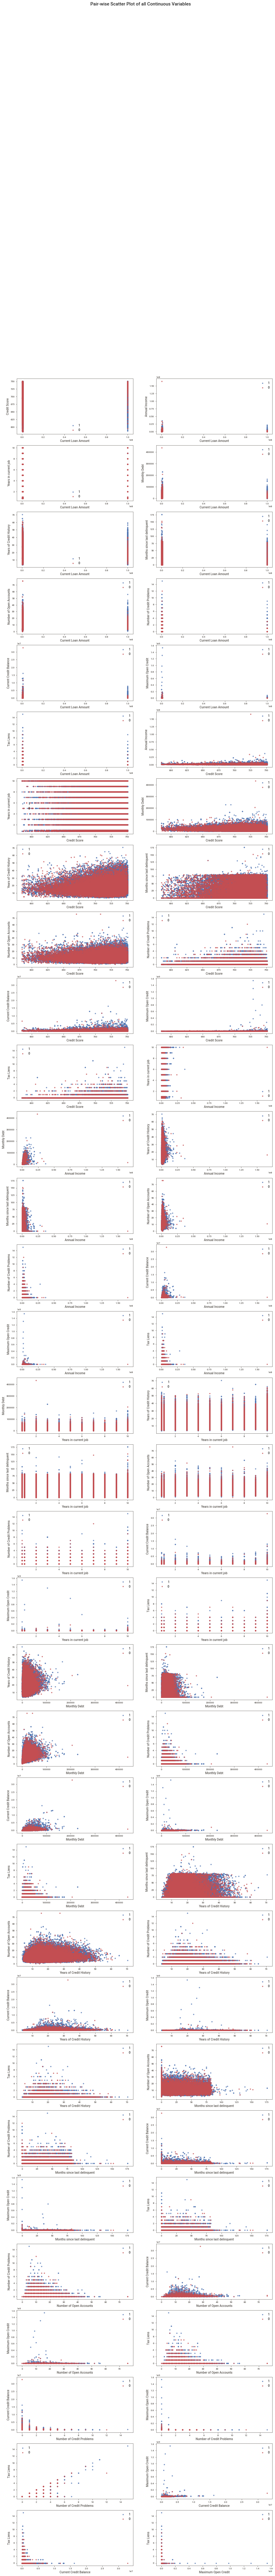

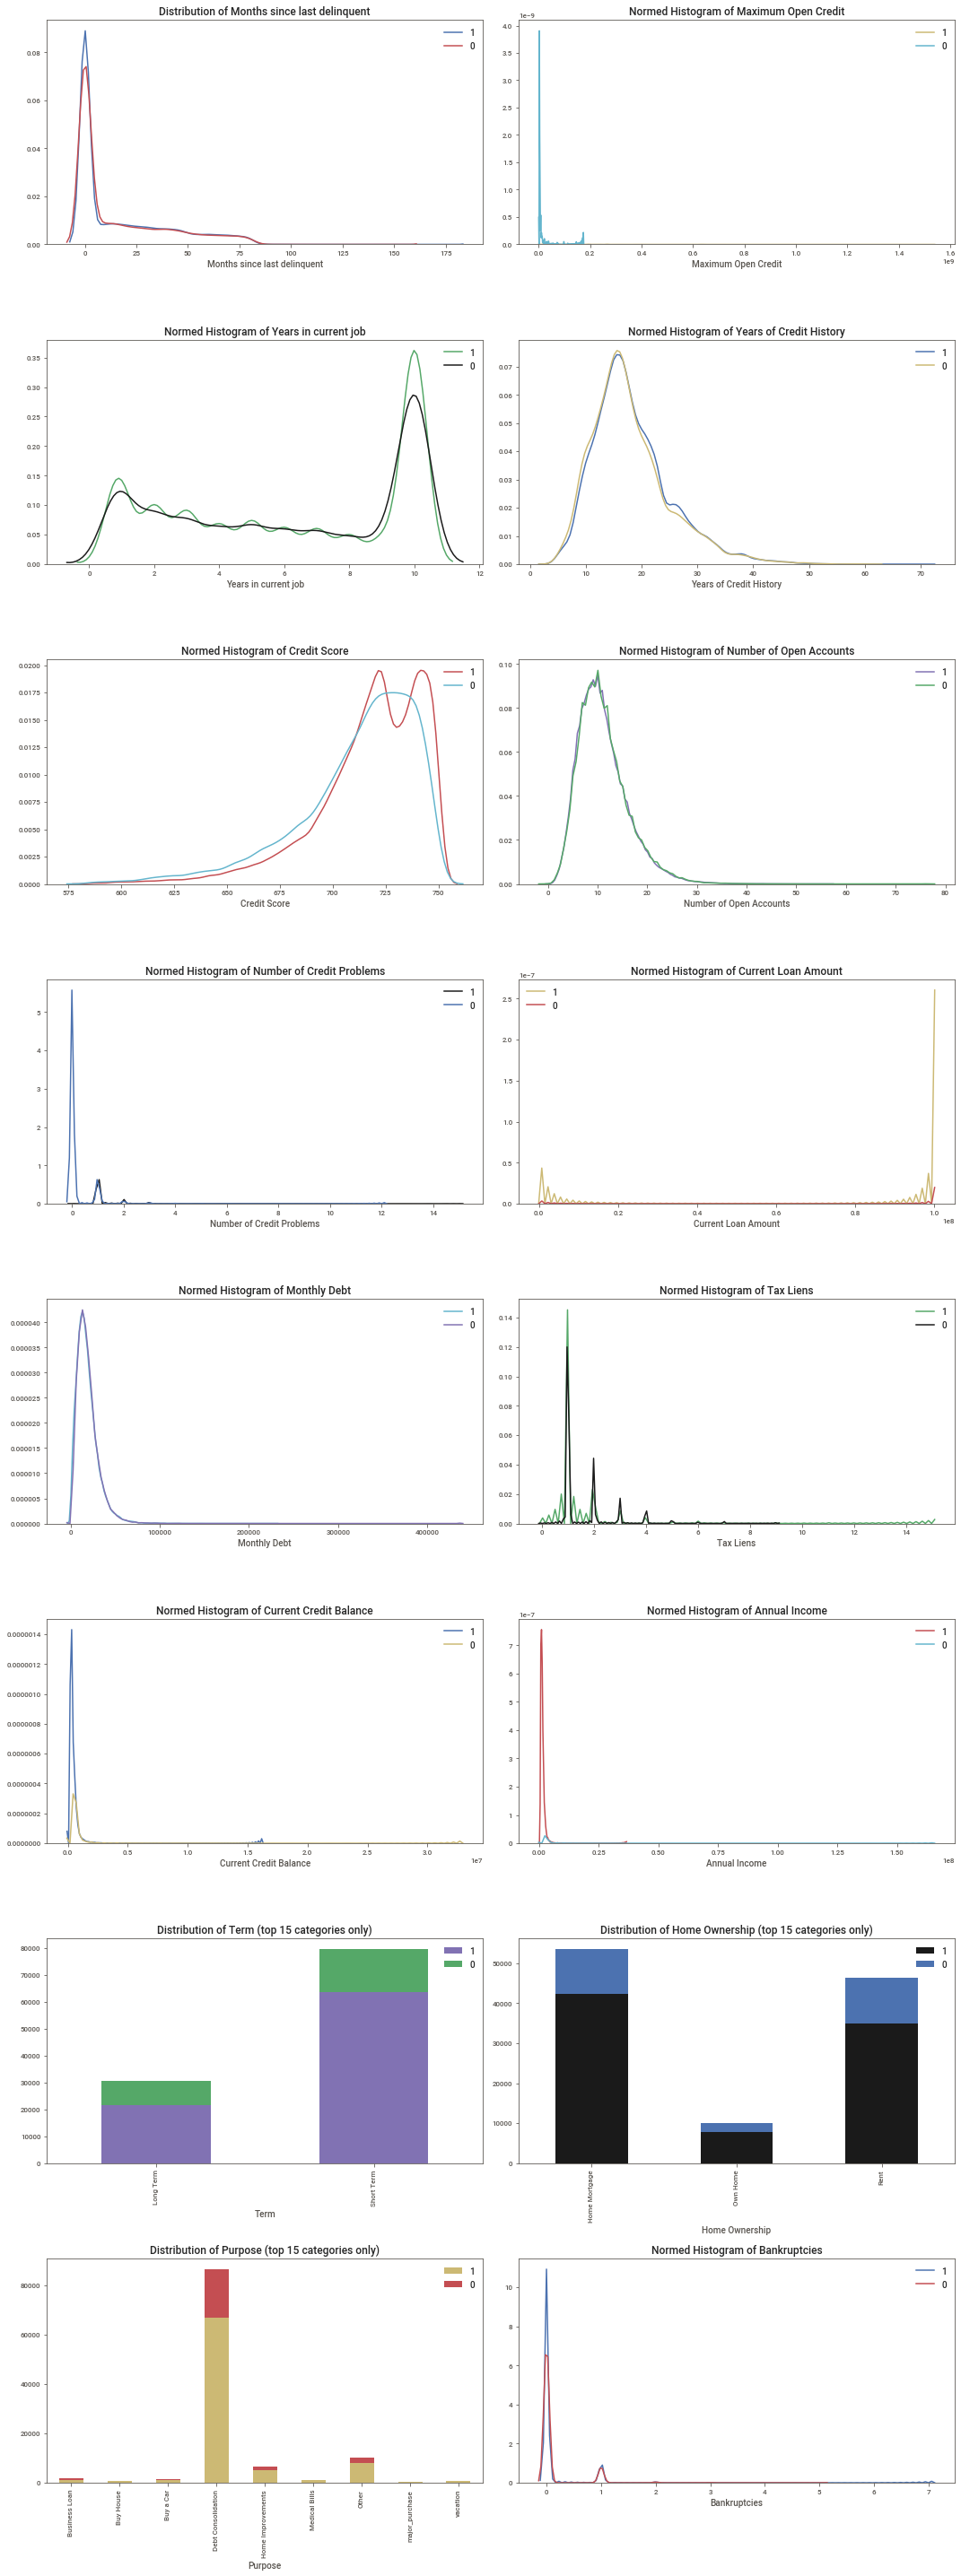

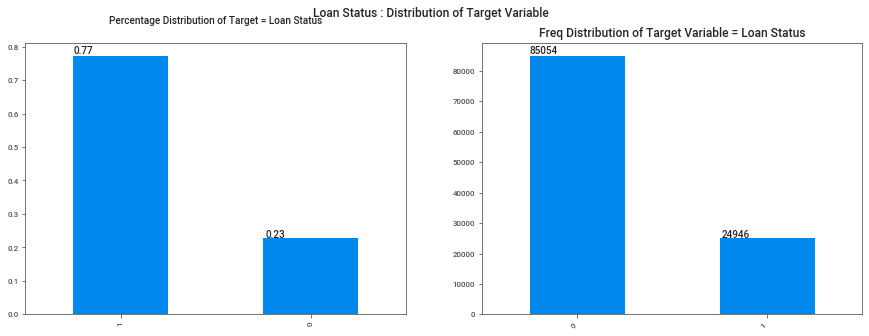

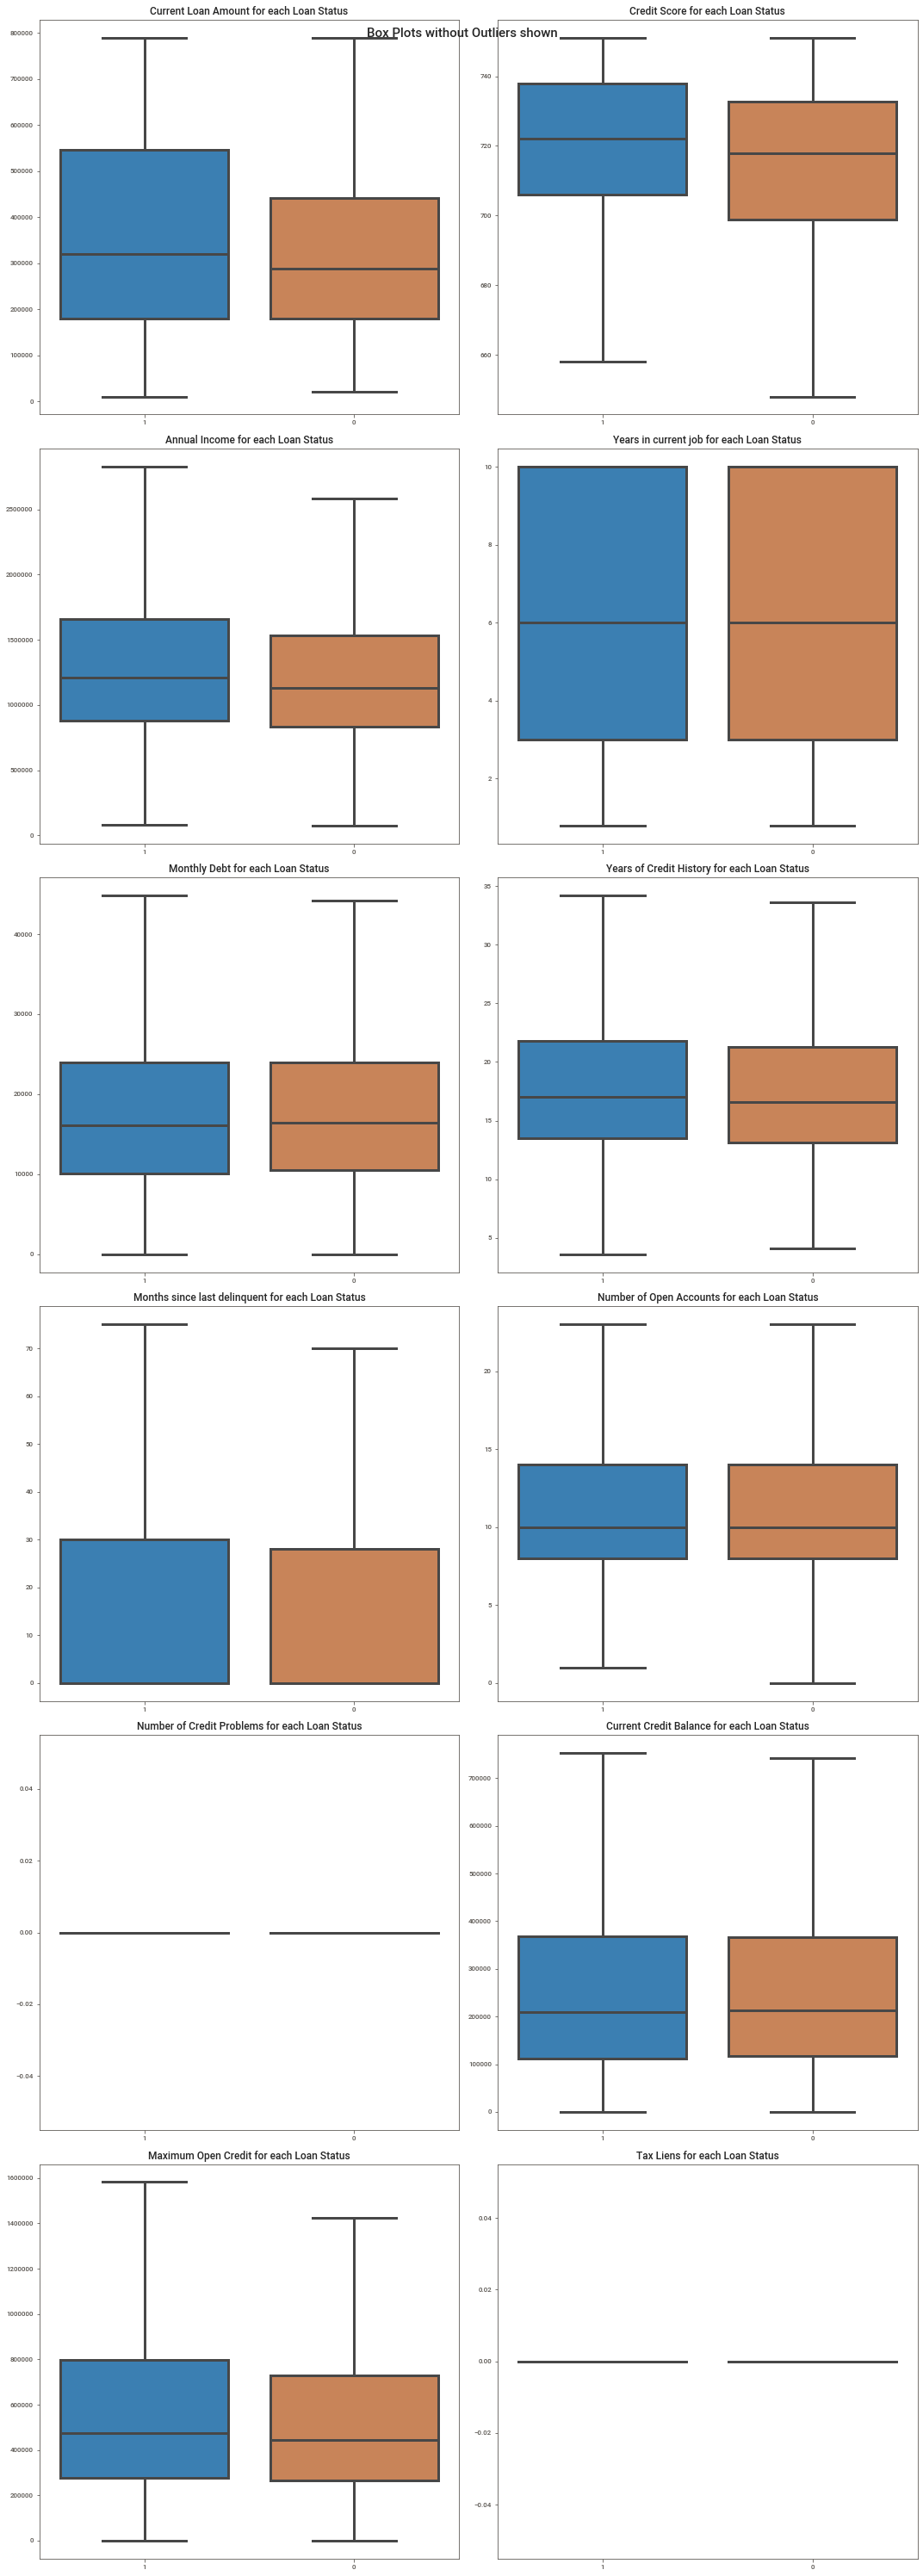

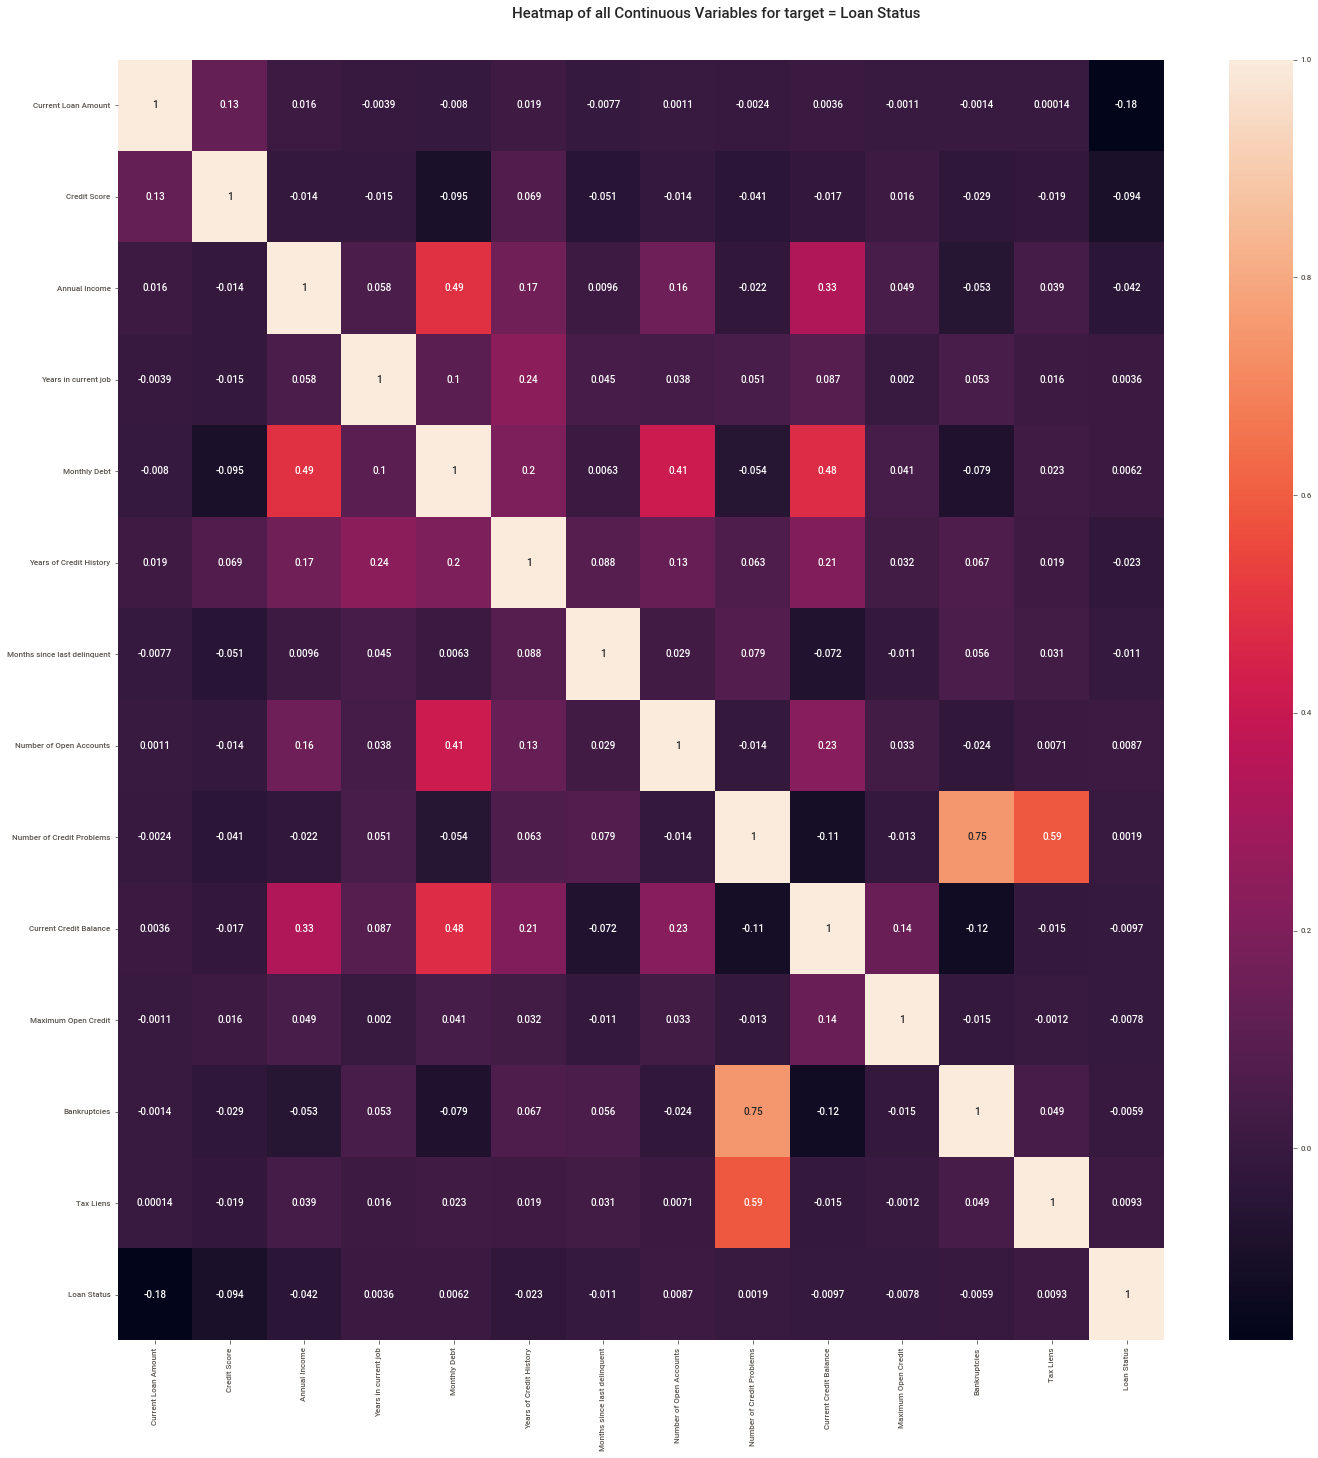

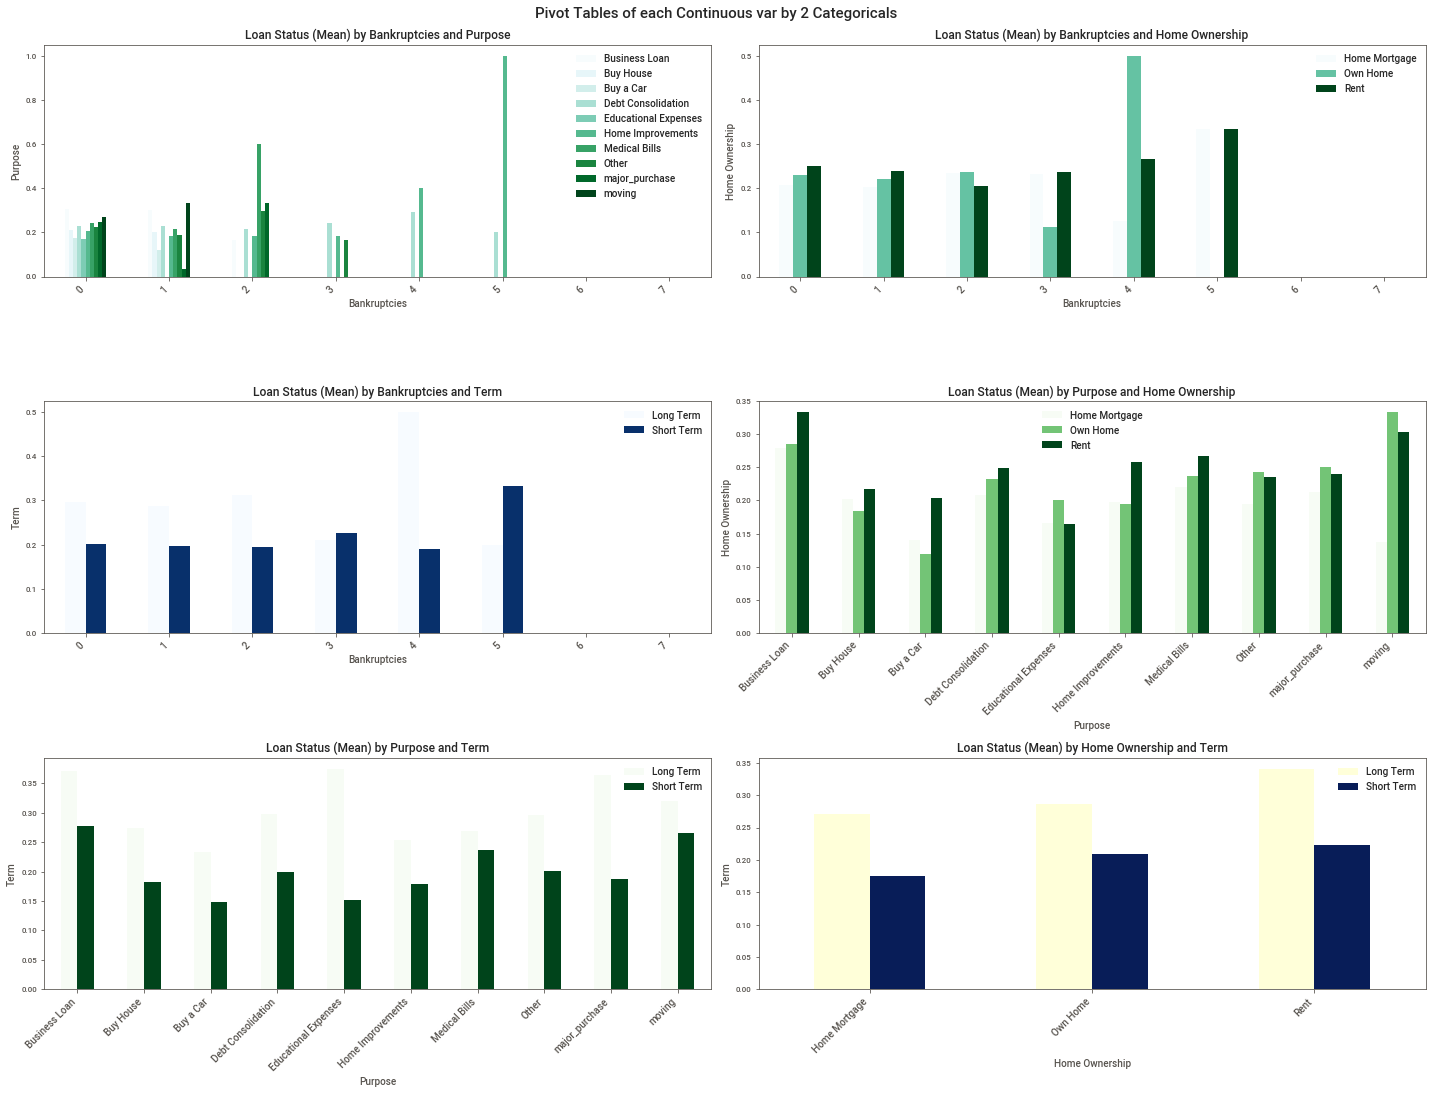

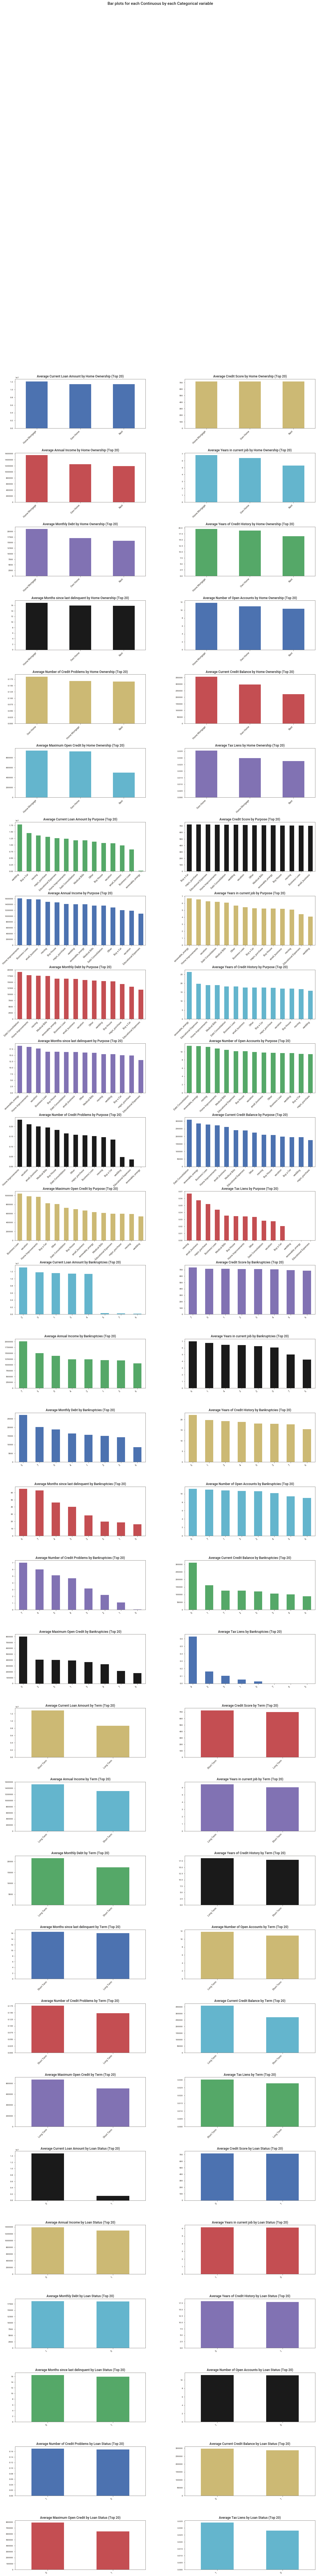

Time to run AutoViz (in seconds) = 81.494

 ###################### VISUALIZATION Completed ########################


In [248]:
dft=loan_av.AutoViz(filename='',dfte=New_Data,verbose=1,depVar='Loan Status')

In [249]:
##saving the current file.

New_Data.to_csv('D:\\iNeuron\\intership_2\\credit_ver9.csv',index=False)

### Checking MultiCollinearity 

In [165]:
# Calculating VIF for the numeric data
vif = pd.DataFrame()
vif["variables"] = trans_dataframe.columns
vif["VIF"] = [variance_inflation_factor(trans_dataframe.values, i) for i in range(trans_dataframe.shape[1])]

In [162]:
vif

,variables,VIF
0,Current Loan Amount,1.141577
1,Credit Score,13.374673
2,Annual Income,3.910798
3,Years in current job,4.252772
4,Monthly Debt,5.855366
5,Years of Credit History,8.887495
6,Months since last delinquent,1.540121
7,Number of Open Accounts,7.203893
8,Number of Credit Problems,8.546818
9,Current Credit Balance,2.246256


Looks like the credit score is higly correlated with other variables .

In [3]:
data=pd.read_csv('D:\\iNeuron\\intership_2\\credit_ver9.csv')

We have observed while exploing data that Number of Credit Problems ,Bankruptcies & Tax Liens are higly correlated (positive) . All show how much bad the financial condition of the customer is currently. We will proceed with 'Number of Credit Problems' and drop other two features or columns. Later we can try adding these features and check if any increment in model performance.

In [4]:
data.drop(['Bankruptcies','Tax Liens'],axis=1,inplace=True)

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110000 entries, 0 to 109999
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Current Loan Amount           110000 non-null  float64
 1   Credit Score                  110000 non-null  float64
 2   Annual Income                 110000 non-null  float64
 3   Years in current job          110000 non-null  float64
 4   Monthly Debt                  110000 non-null  float64
 5   Years of Credit History       110000 non-null  float64
 6   Months since last delinquent  110000 non-null  float64
 7   Number of Open Accounts       110000 non-null  float64
 8   Number of Credit Problems     110000 non-null  float64
 9   Current Credit Balance        110000 non-null  float64
 10  Maximum Open Credit           110000 non-null  float64
 11  Loan Status                   110000 non-null  int64  
 12  Term                          110000 non-nul

In [8]:
data[['Current Loan Amount','Annual Income','Monthly Debt','Current Credit Balance']].describe()

,Current Loan Amount,Annual Income,Monthly Debt,Current Credit Balance
count,110000.000000,110000.000000,110000.000000,110000.000000
mean,11746206.827900,1367203.236140,18468.526823,294282.171564
std,31767162.177713,993697.100715,12195.564391,377277.271885
min,10802.000000,76627.000000,0.000000,0.000000
25%,179586.000000,868224.000000,10211.930000,112195.000000
50%,312026.000000,1182003.300000,16202.440000,209665.000000
75%,523930.000000,1631118.650000,23997.522500,367483.750000
max,99999999.000000,165557393.000000,435843.280000,32878968.000000


<Figure size 1080x1008 with 0 Axes>

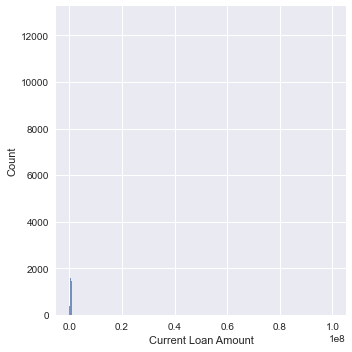

In [9]:
plt.figure(figsize=(15,14))
sns.displot(data['Current Loan Amount'])
plt.show()

In [11]:
# Just checking how many values beyond 100000 dollars
len(data[data['Current Loan Amount']>1000000.000000])

12617

In [10]:
len(data[data['Current Loan Amount']==99999999.000000])

12617

Above shows all values beyond 100000 is entered as 9999999.00000 which looks like an error . We will check the same in boxplot.

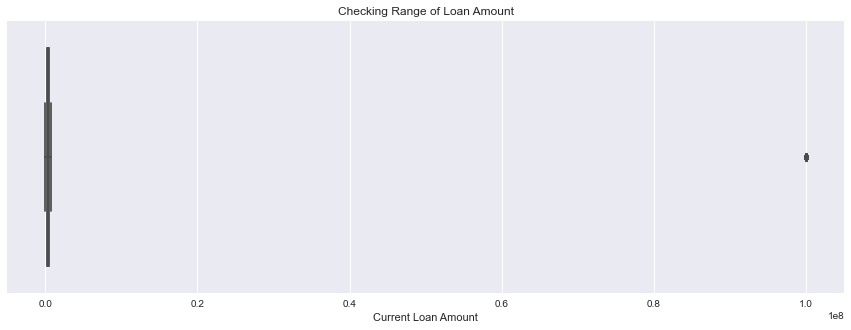

In [12]:
plt.figure(figsize=(15,5))
sns.boxplot(data['Current Loan Amount'])
plt.title('Checking Range of Loan Amount')
plt.show()

Above boxplot shows the same.This can be treated as an outlier. We will handle this by first changing the large values to nan and then using KNNImputer.

In [13]:
##first Changing 9999999 to 0

data.replace({'Current Loan Amount':{99999999.000000:0}},inplace=True)

In [14]:
data['Current Loan Amount'].describe()

count   110000.000000
mean    276206.942600
std     201312.164801
min          0.000000
25%     128150.000000
50%     241175.000000
75%     401896.000000
max     789250.000000
Name: Current Loan Amount, dtype: float64

In [15]:
data['Current Loan Amount'].describe()

count   110000.000000
mean    276206.942600
std     201312.164801
min          0.000000
25%     128150.000000
50%     241175.000000
75%     401896.000000
max     789250.000000
Name: Current Loan Amount, dtype: float64

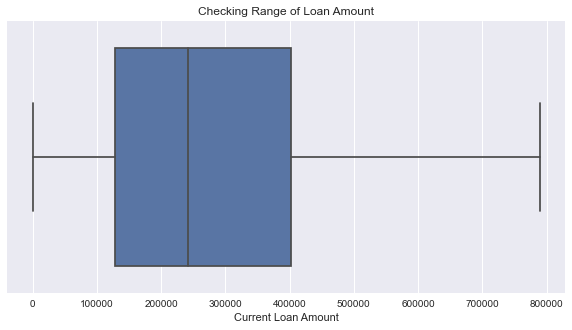

In [16]:
plt.figure(figsize=(10,5))
sns.boxplot(data['Current Loan Amount'])
plt.title('Checking Range of Loan Amount')
plt.show()

All extreme values are now converted to zero .

In [17]:
##Next will convert them to NAN so that we can impute
data['Current Loan Amount'].replace(0,np.nan,inplace=True)

In [18]:
##Checking if  null values are created.
data.isnull().sum()

Current Loan Amount             12617
Credit Score                        0
Annual Income                       0
Years in current job                0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent        0
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Loan Status                         0
Term                                0
Home Ownership                      0
Purpose                             0
dtype: int64

In [ ]:
##Checking if  null values are created.
data.isnull().sum()

In [19]:
##getting the numerical columns together as KNNImputer will need numerical columns.
num_cols=data.select_dtypes(include=np.number)

In [20]:
num_cols=data.select_dtypes(include=np.number)

In [21]:
impute_knn=KNNImputer()

In [23]:
trans=impute_knn.fit_transform(num_cols)

In [24]:
type(trans)

numpy.ndarray

In [25]:
imputed_data=pd.DataFrame(trans,columns=['Current Loan Amount',
 'Credit Score',
 'Annual Income',
 'Years in current job',
 'Monthly Debt',
 'Years of Credit History',
 'Months since last delinquent',
 'Number of Open Accounts',
 'Number of Credit Problems',
 'Current Credit Balance',
 'Maximum Open Credit',
 'Loan Status'])

In [26]:
imputed_data.isnull().sum()

Current Loan Amount             0
Credit Score                    0
Annual Income                   0
Years in current job            0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Loan Status                     0
dtype: int64

In [27]:
imputed_data.describe()

,Current Loan Amount,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Loan Status
count,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000
mean,312484.539240,716.286718,1367203.236140,6.128938,18468.526823,18.202485,16.359682,11.124491,0.168055,294282.171564,754088.666840,0.773218
std,181241.576848,26.477465,993697.100715,3.544057,12195.564391,7.015575,23.011923,5.011093,0.484389,377277.271885,8013929.854632,0.418752
min,10802.000000,585.000000,76627.000000,0.800000,0.000000,3.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,175054.000000,704.000000,868224.000000,3.000000,10211.930000,13.500000,0.000000,8.000000,0.000000,112195.000000,273152.000000,1.000000
50%,269324.000000,721.000000,1182003.300000,6.000000,16202.440000,16.900000,0.000000,10.000000,0.000000,209665.000000,467379.000000,1.000000
75%,430408.000000,736.400000,1631118.650000,10.000000,23997.522500,21.700000,30.000000,14.000000,0.000000,367483.750000,783183.500000,1.000000
max,789250.000000,751.000000,165557393.000000,10.000000,435843.280000,70.500000,176.000000,76.000000,15.000000,32878968.000000,1539737892.000000,1.000000


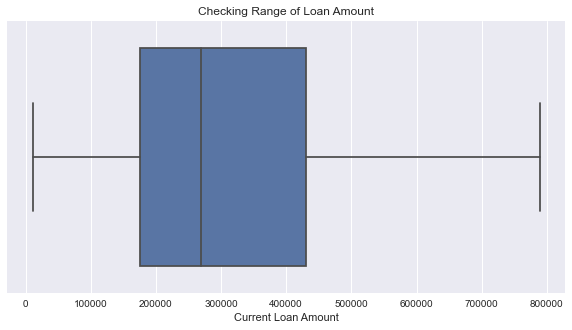

In [28]:
plt.figure(figsize=(10,5))
sns.boxplot(imputed_data['Current Loan Amount'])
plt.title('Checking Range of Loan Amount')
plt.show()

In [29]:
##Before concating dataset we will check for one categorical feature before encoding

cat_cols=data.select_dtypes(exclude=np.number)

In [30]:
data.select_dtypes(exclude=np.number).columns.to_list()

['Term', 'Home Ownership', 'Purpose']

In [31]:
len(data['Purpose'].unique())

14

In [32]:
data['Purpose'].unique()

array(['Home Improvements', 'Debt Consolidation', 'Buy House', 'Other',
       'Business Loan', 'Buy a Car', 'major_purchase', 'vacation',
       'small_business', 'Medical Bills', 'wedding',
       'Educational Expenses', 'moving', 'renewable_energy'], dtype=object)

Looks like all are Unique . We will go ahead with encoding this features. Later on we can see if further modification can be done on this categorical feature.

In [33]:
new_data=pd.concat([imputed_data,data[data.select_dtypes(exclude=np.number).columns.to_list()]],axis=1)

In [34]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110000 entries, 0 to 109999
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Current Loan Amount           110000 non-null  float64
 1   Credit Score                  110000 non-null  float64
 2   Annual Income                 110000 non-null  float64
 3   Years in current job          110000 non-null  float64
 4   Monthly Debt                  110000 non-null  float64
 5   Years of Credit History       110000 non-null  float64
 6   Months since last delinquent  110000 non-null  float64
 7   Number of Open Accounts       110000 non-null  float64
 8   Number of Credit Problems     110000 non-null  float64
 9   Current Credit Balance        110000 non-null  float64
 10  Maximum Open Credit           110000 non-null  float64
 11  Loan Status                   110000 non-null  float64
 12  Term                          110000 non-nul

In [ ]:
##saving the current file.
new_data.to_csv('D:\\iNeuron\\intership_2\\credit_ver10.csv',index=False)

In [84]:
print("*********"*10)

******************************************************************************************


# OUTlair removal method

In [142]:
# Outlier Detection using Tuckey's Method
from collections import Counter

def detect_outlier(df,n,features):
    outlier_indecies=[]
    for col in features:
        Q1 = np.percentile(df[col],25)     # Finding the Quartile Range
        Q3 = np.percentile(df[col],75)     # Finding the 3rd Quartile Range
        
        IQR = Q3 - Q1
        
        #Setting the outlier Steps
        outlier_steps= 1.5 *IQR
        
        #findinfg the outlier indices
        
        outlier_indices_col = df[(df[col] < Q1 - outlier_steps) | (df[col] > Q3 + outlier_steps)].index
        outlier_indecies.extend(outlier_indices_col)
        
    outlier_indecies = Counter(outlier_indecies)
    
    multiple_outlier = list(k for k,v in outlier_indecies.items() if v>n)
    return multiple_outlier

In [131]:
New_Data.columns

Index(['Current Loan Amount', 'Credit Score', 'Annual Income',
       'Years in current job', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Tax Liens', 'Term', 'Home Ownership',
       'Purpose'],
      dtype='object')

In [139]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

New_Data['Home Ownership']=le.fit_transform(New_Data['Home Ownership'])

In [140]:
New_Data['Home Ownership'].unique()

array([0, 1, 2])

In [143]:
detect_outlier(New_Data,2,['Home Ownership'])

[]